In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('/content/drive/MyDrive/Walmart DataSet.csv')

In [13]:
df.head().T

0           1           2           3           4
Store                  1           1           1           1           1
Date          05-02-2010  12-02-2010  19-02-2010  26-02-2010  05-03-2010
Weekly_Sales   1643690.9  1641957.44  1611968.17  1409727.59  1554806.68
Holiday_Flag           0           1           0           0           0
Temperature        42.31       38.51       39.93       46.63        46.5
Fuel_Price         2.572       2.548       2.514       2.561       2.625
CPI           211.096358   211.24217  211.289143  211.319643  211.350143
Unemployment       8.106       8.106       8.106       8.106       8.106

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [16]:
df.shape

(6435, 8)

In [17]:
df.duplicated().sum()

0

In [18]:
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [19]:
indices_to_remove = ['Holiday_Flag']
num_columns=num_columns.difference(indices_to_remove)

In [20]:
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

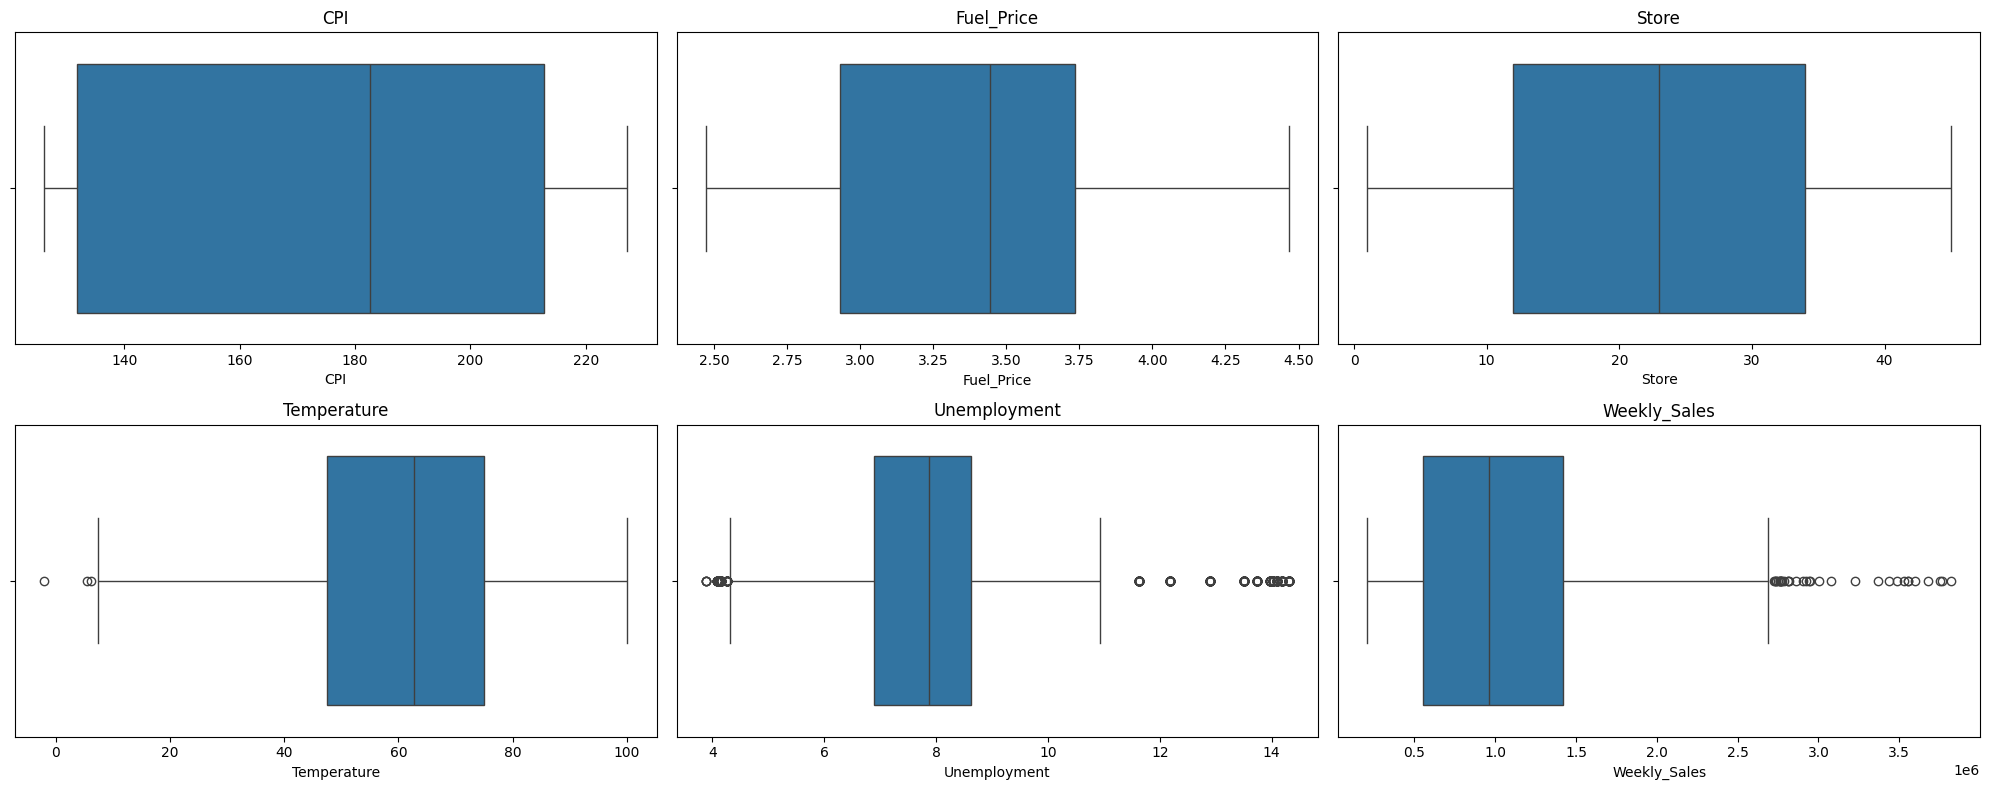

In [21]:
plt.figure(figsize=(20,8))
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.title(col)
plt.show()

In [22]:
def remove_outliers(df1,col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    Lower_Band = q1-1.5*IQR
    Upper_Band = q3+1.5*IQR
    df[col]=np.clip(df[col],Lower_Band,Upper_Band)
    return df1

def treat_outliers(df1,col_list):
    for col in col_list:
        df1=remove_outliers(df1,col)
    return df1

In [23]:
df=treat_outliers(df,num_columns)

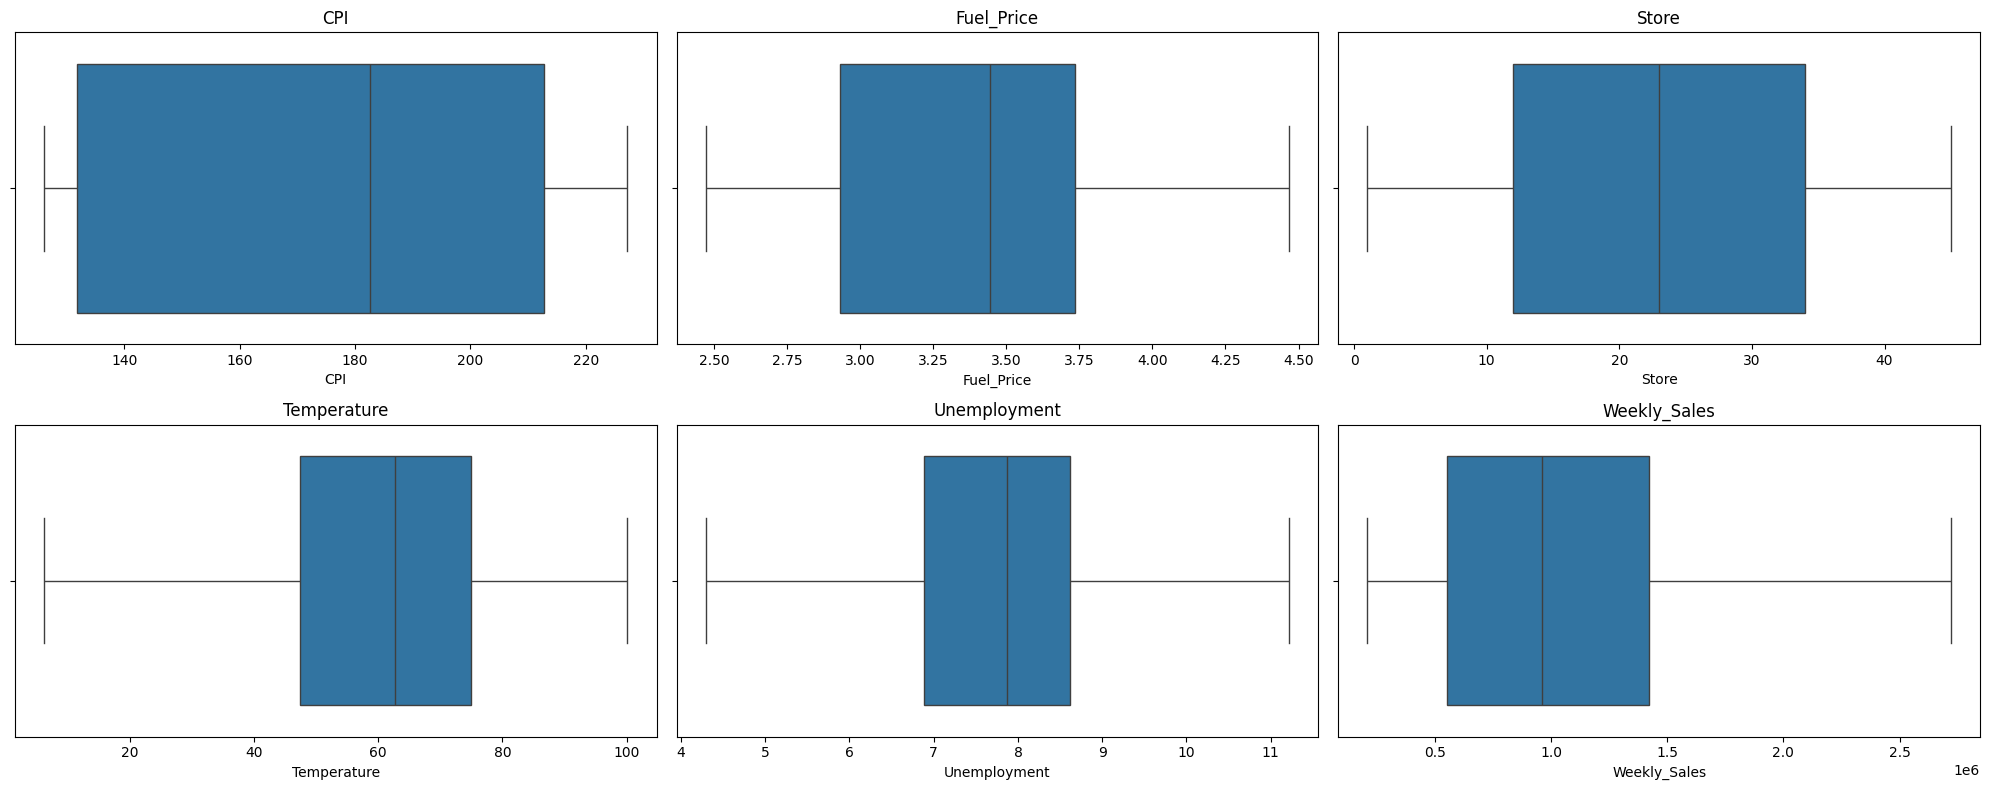

In [24]:
plt.figure(figsize=(20,8))
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.title(col)
plt.show()

In [25]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [29]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

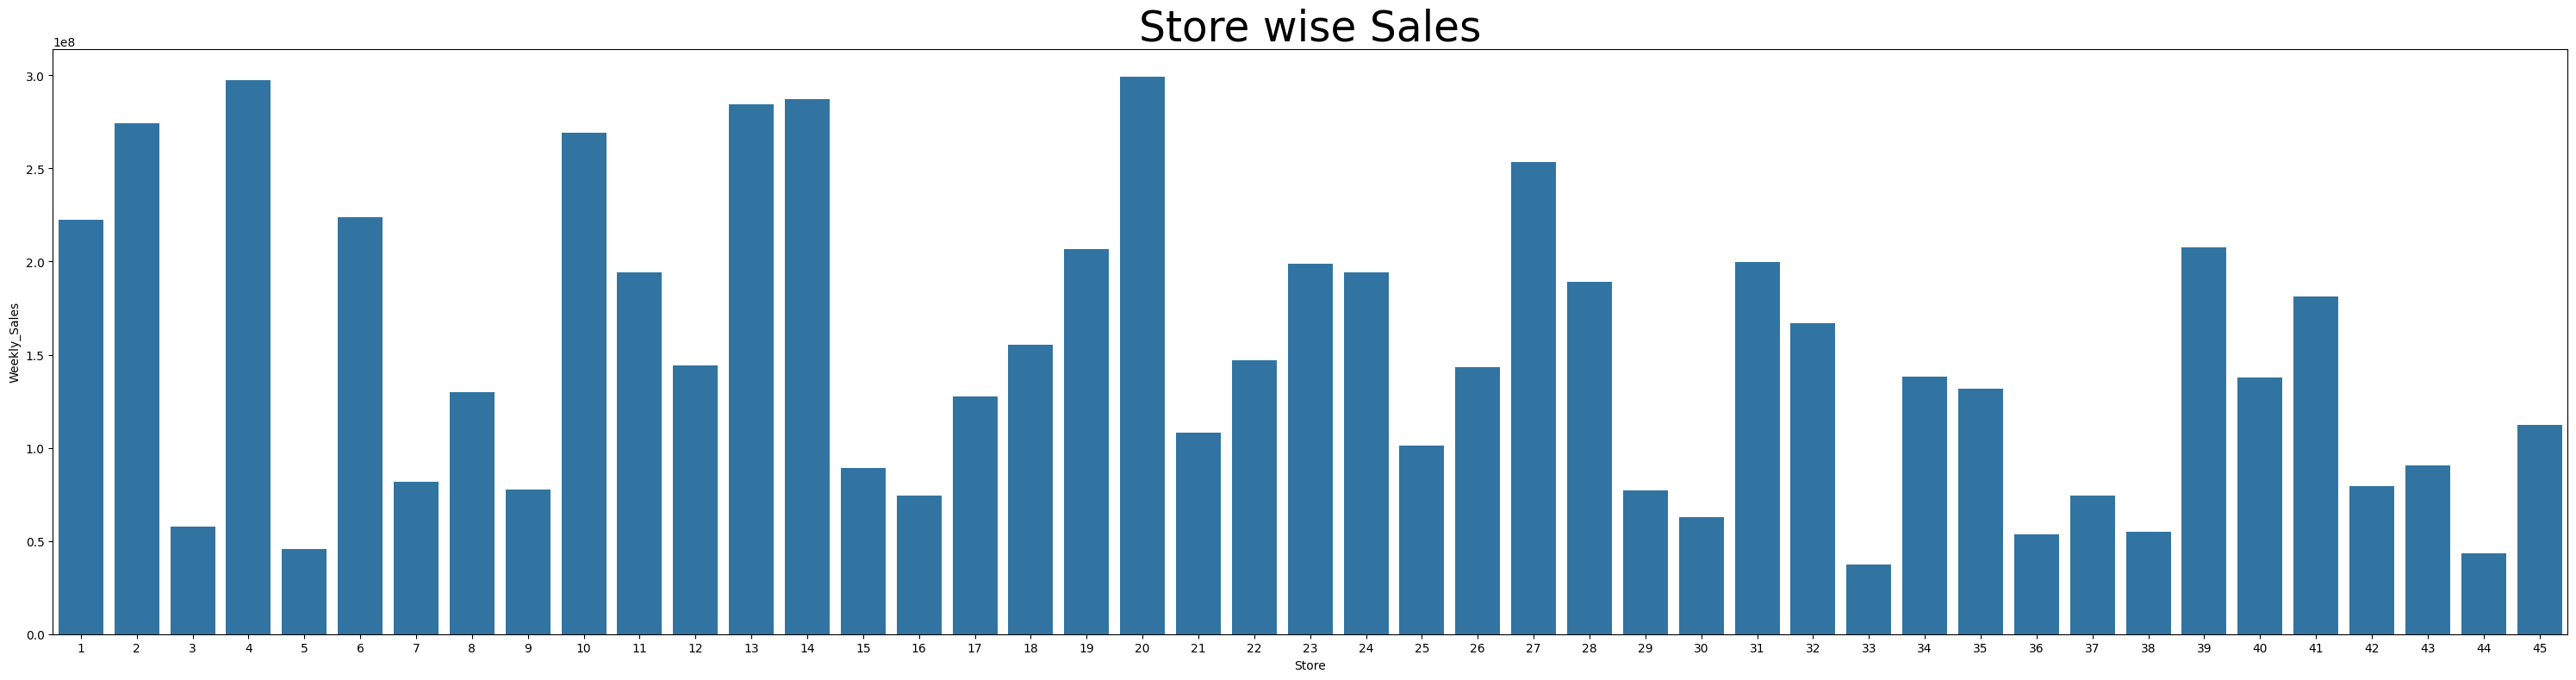

In [32]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
#plt.xlabel('Store',fontsize=23)
#plt.ylabel('Weekly_Sales',fontsize=23)
plt.tight_layout()
plt.show()

In [33]:
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
top_10_Sale_Store

Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08
9      10  2.692807e+08
26     27  2.534795e+08
5       6  2.237489e+08
0       1  2.224028e+08
38     39  2.074455e+08

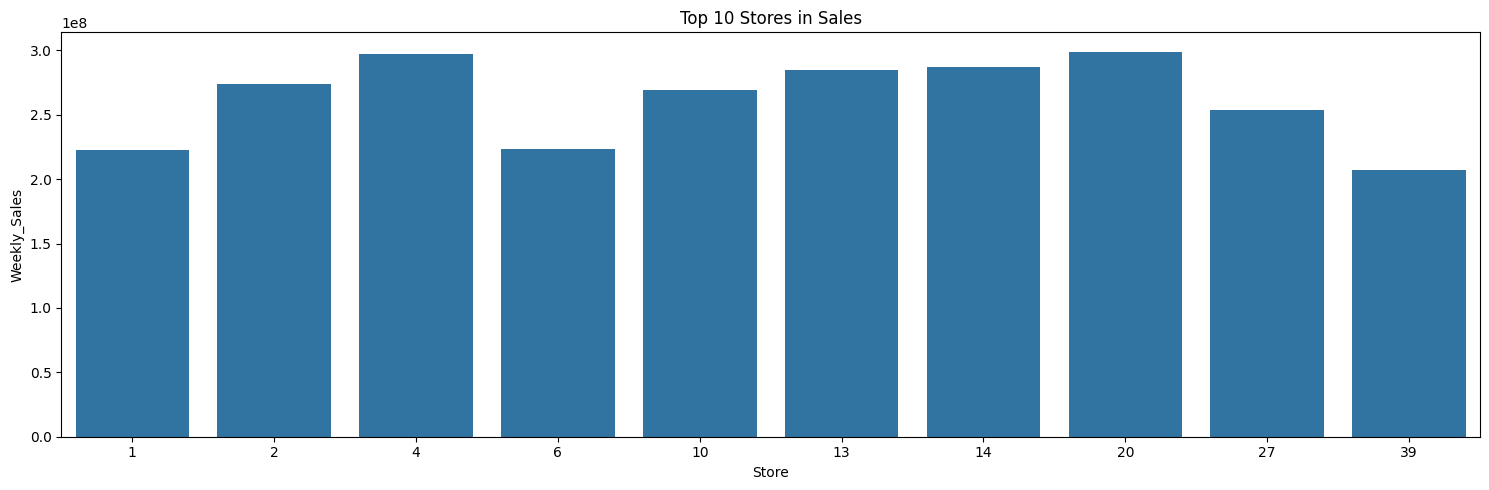

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [35]:
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store

Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31

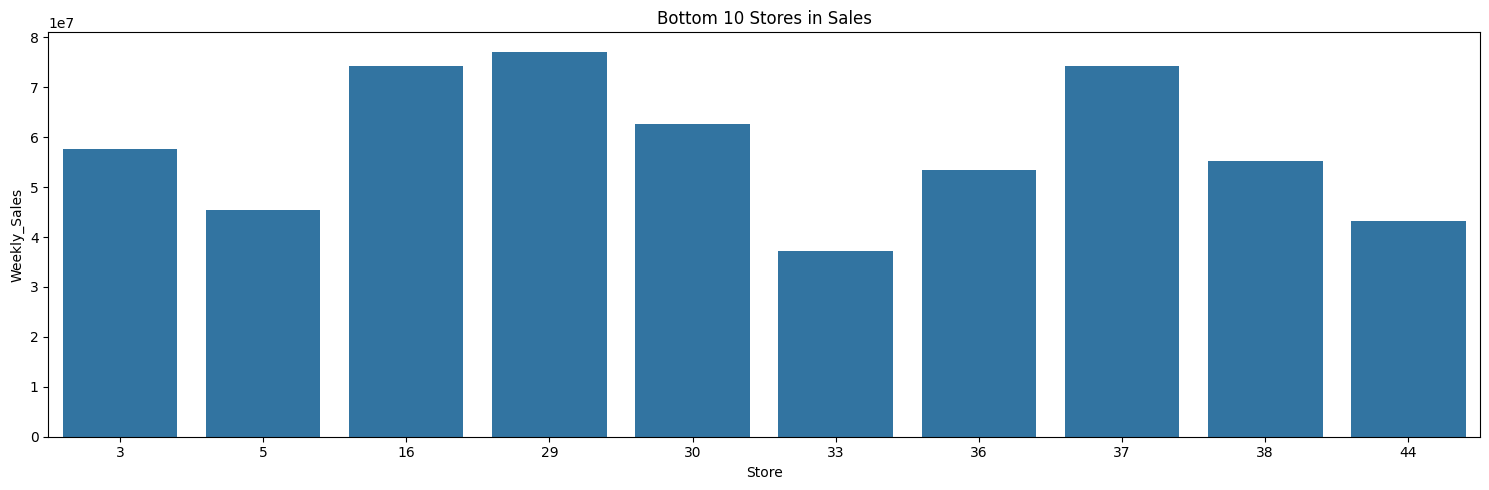

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [37]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [42]:
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True)
df_date_sales.head(5)

Date  Weekly_Sales
0  01-04-2011   43458991.19
1  01-06-2012   48281649.72
2  01-07-2011   47578519.50
3  01-10-2010   42239875.87
4  02-03-2012   46861034.97

In [44]:
df_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

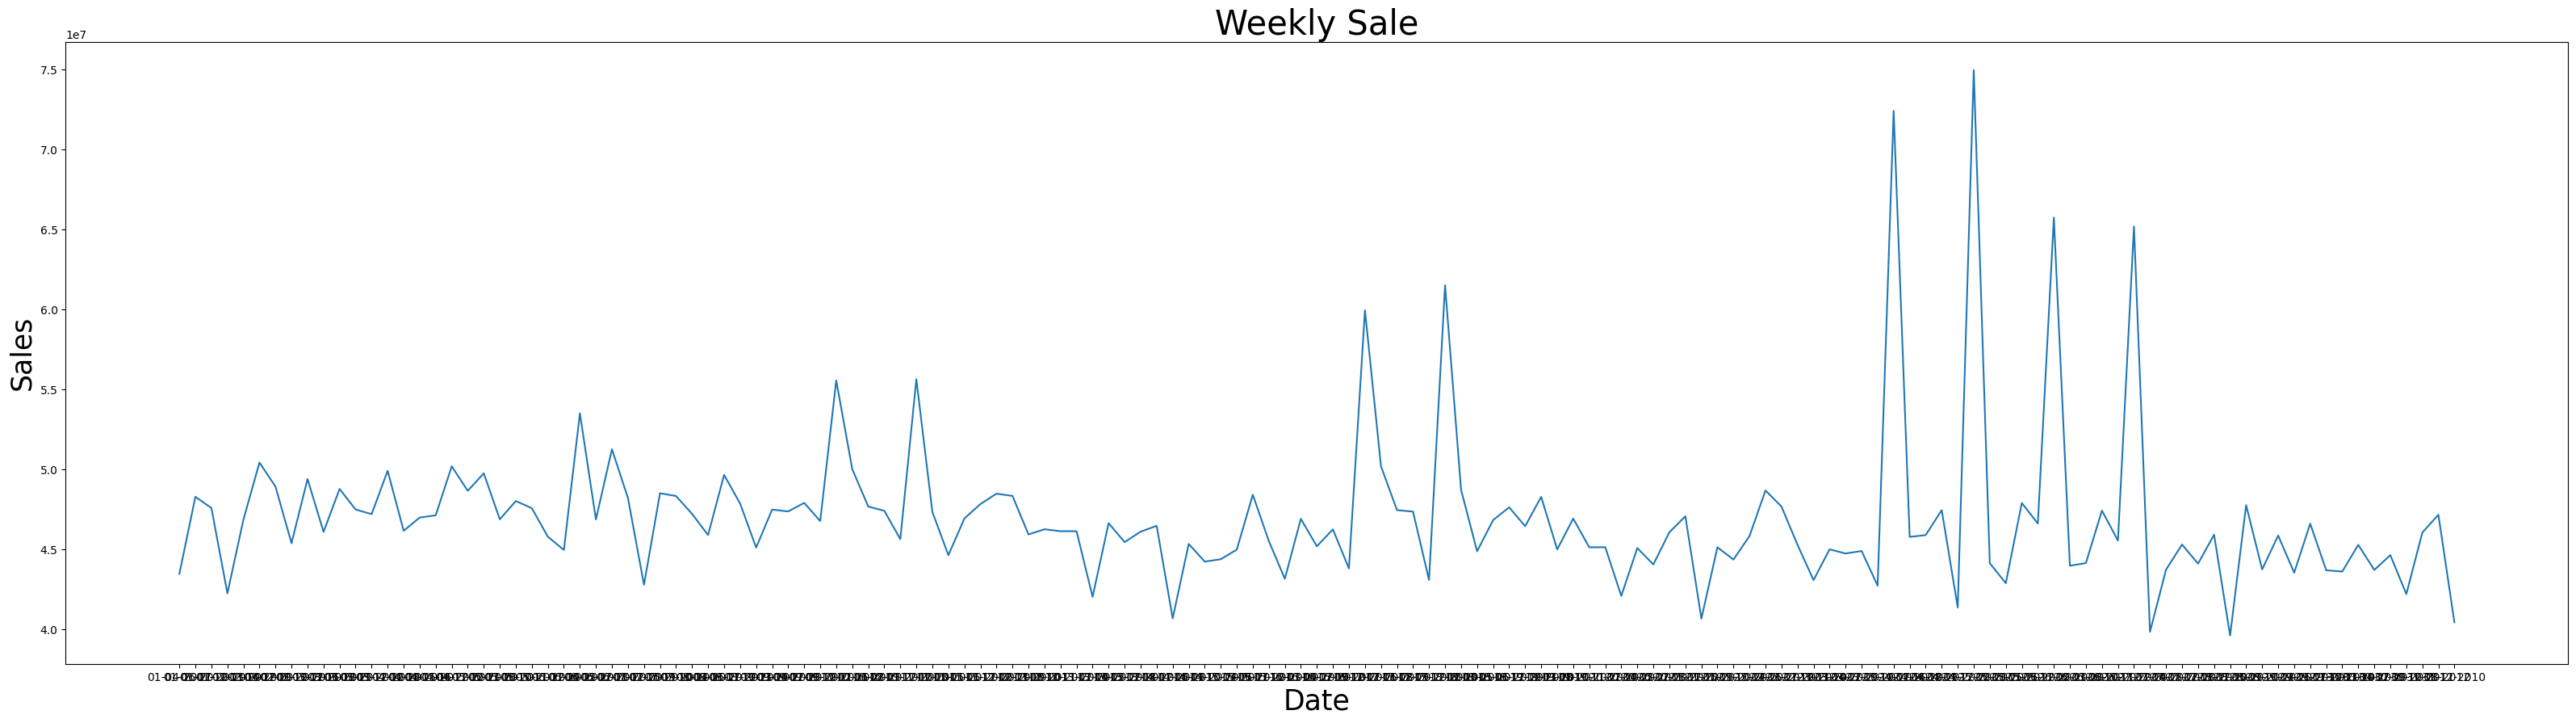

In [45]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales)
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)

In [51]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [52]:
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [53]:
df_Hf_Sales

Holiday_Flag  Weekly_Sales
0             0  6.220935e+09
1             1  5.038284e+08

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

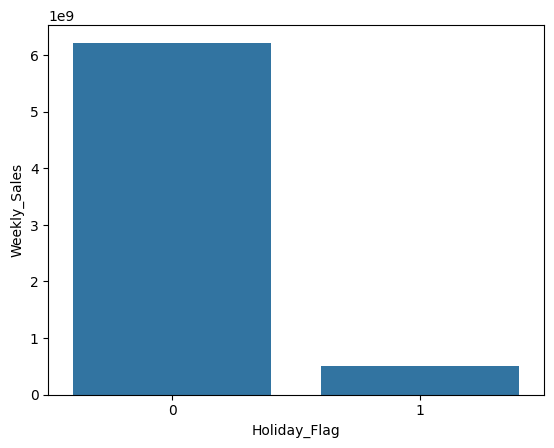

In [54]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales)

In [55]:
df['Temperature'].min()

6.240000000000002

In [56]:
df['Temperature'].max()

100.14

In [57]:
bins = [0,25,50,75,100]
labels = ['0-25','26-50','51-75','76-100']

In [58]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels)

In [59]:
df['Temp_Category'].value_counts()

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       224
Name: count, dtype: int64

In [60]:
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

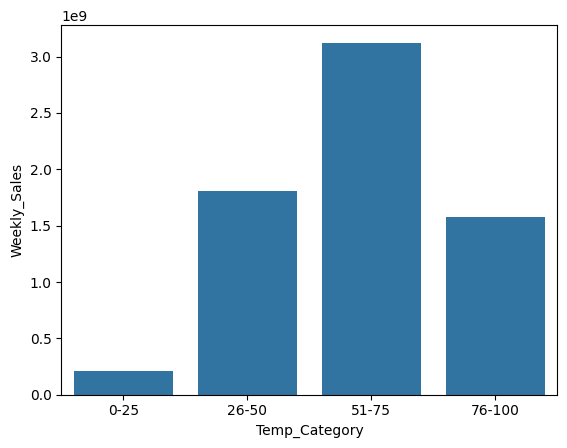

In [61]:
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

In [62]:
df['Fuel_Price'].min()

2.472

In [63]:
df['Fuel_Price'].max()

4.468

In [64]:
bins1 = [2,2.5,3,3.5,4,4.5]
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [65]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1)

In [66]:
df['Fuel_Price_Cat'].value_counts()

Fuel_Price_Cat
3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: count, dtype: int64

In [67]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()

In [68]:
df_Fuel_Price_Sales

Fuel_Price_Cat  Weekly_Sales
0          2-2.5  4.702810e+05
1          2.6-3  1.945889e+09
2        3.1-3.5  1.620472e+09
3          3.6-4  2.738130e+09
4        4.1-4.5  4.198009e+08

<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

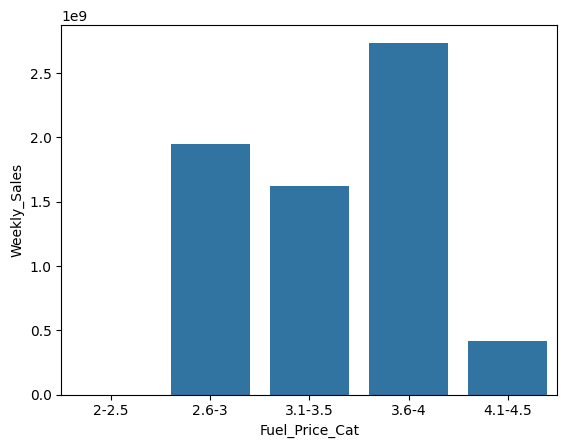

In [69]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)

In [70]:
df['CPI'].min()

126.064

In [71]:
df['CPI'].max()

227.2328068

In [72]:
bins2=[125,155,185,215,245]
labels2=['125-155','156-185','186-215','216-245',]

In [73]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2)

In [74]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Temp_Category Fuel_Price_Cat  CPI_cat  
0  211.096358         8.106         26-50          2.6-3  186-215  
1  211.242170         8.106         26-50          2.6-3  186-215  
2  211.289143         8.106         26-50          2.6-3  186-215  
3  211.319643         8.106         26-50          2.6-3  186-215  
4  211.350143         8.106         26-50          2.6-3  186-215

In [75]:
df['CPI_cat'].value_counts()

CPI_cat
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [76]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index()

In [77]:
df_Cpi_Sales

CPI_cat  Weekly_Sales
0  125-155  3.400064e+09
1  156-185  1.738193e+08
2  186-215  2.028806e+09
3  216-245  1.122074e+09

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

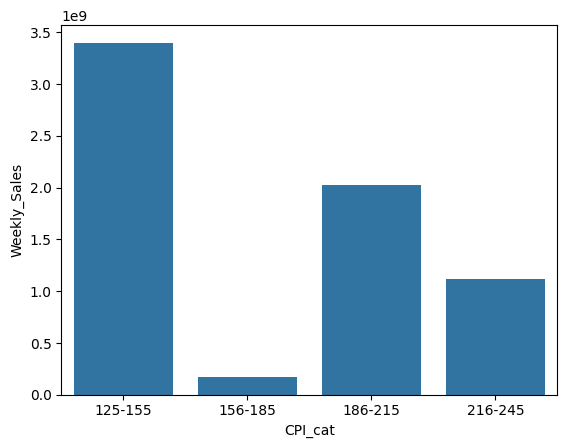

In [78]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

In [79]:
df['Unemployment'].min()

4.2945

In [80]:
df['Unemployment'].max()

11.218499999999999

In [81]:
bins3=[4,6,8,10,12]
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [82]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3)

In [83]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
6.1-8      2795
8.1-10     2389
10.1-12     629
4-6         622
Name: count, dtype: int64

In [84]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

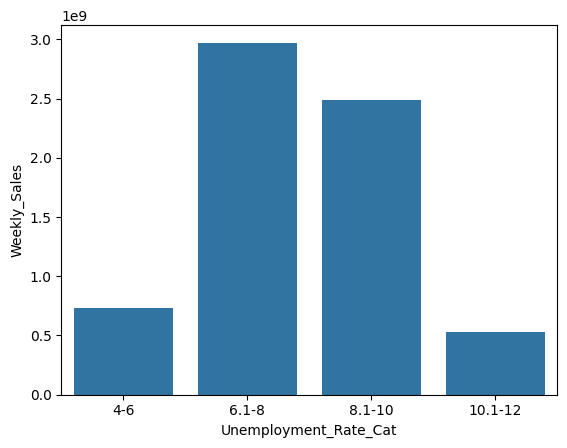

In [85]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

In [86]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [ ]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [ ]:
corr_df = df_Encode.corr()

In [ ]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

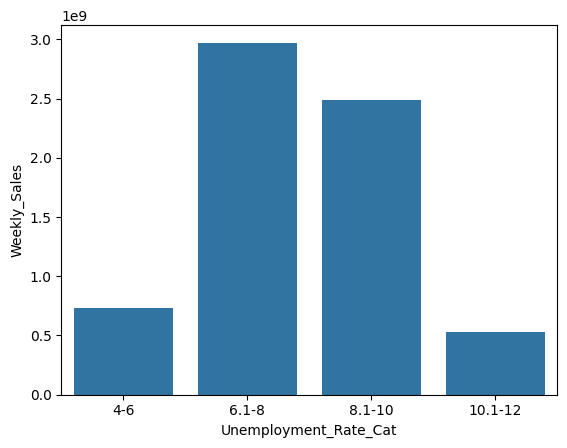

In [90]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

In [92]:
df.info()# Checking the dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Store                  6435 non-null   int64   
 1   Date                   6435 non-null   object  
 2   Weekly_Sales           6435 non-null   float64 
 3   Holiday_Flag           6435 non-null   int64   
 4   Temperature            6435 non-null   float64 
 5   Fuel_Price             6435 non-null   float64 
 6   CPI                    6435 non-null   float64 
 7   Unemployment           6435 non-null   float64 
 8   Temp_Category          6433 non-null   category
 9   Fuel_Price_Cat         6435 non-null   category
 10  CPI_cat                6435 non-null   category
 11  Unemployment_Rate_Cat  6435 non-null   category
dtypes: category(4), float64(5), int64(2), object(1)
memory usage: 428.3+ KB


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
label_encoder=LabelEncoder()

In [95]:
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat'])

In [96]:
df['Unemployment_Rate_Cat'].value_counts()

Unemployment_Rate_Cat
2    2795
3    2389
0     629
1     622
Name: count, dtype: int64

In [97]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]

In [98]:
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [99]:
sales_unemp_store

Store  Weekly_Sales
0       4  1.782381e+08
1       5  1.416884e+07
2       6  4.684711e+07
3       8  3.923392e+07
4       9  2.397403e+07
5      12  1.442872e+08
6      13  6.152466e+07
7      16  2.016068e+06
8      17  1.623276e+07
9      23  1.987367e+08
10     28  1.892637e+08
11     29  3.276784e+07
12     33  2.299155e+06
13     34  6.496434e+07
14     38  5.515963e+07
15     40  1.378703e+08
16     43  4.080224e+07
17     44  1.418737e+07

In [100]:
print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate is listed Below : 


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69

In [101]:
# Weekly Sales
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)


# Temperature
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True)
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


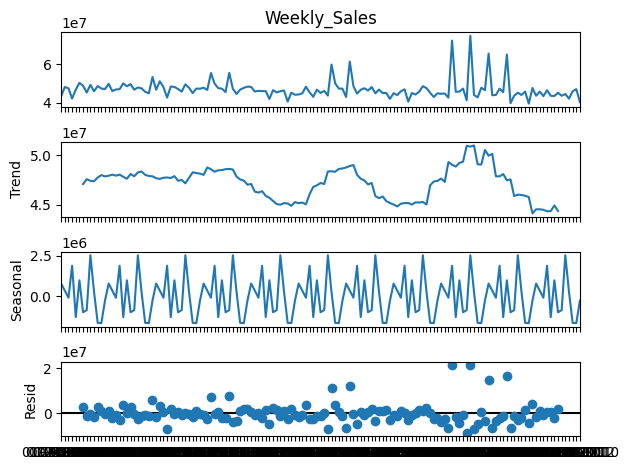

In [102]:
print(sales_decomposition.plot())

Figure(640x480)


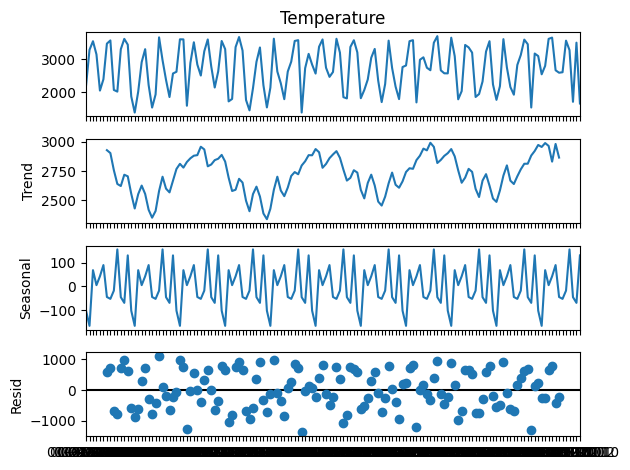

In [103]:
print(Temperature_decomposition.plot())

In [104]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

In [107]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

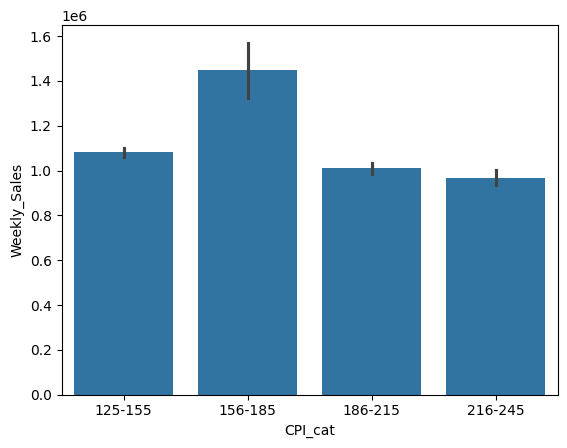

In [109]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

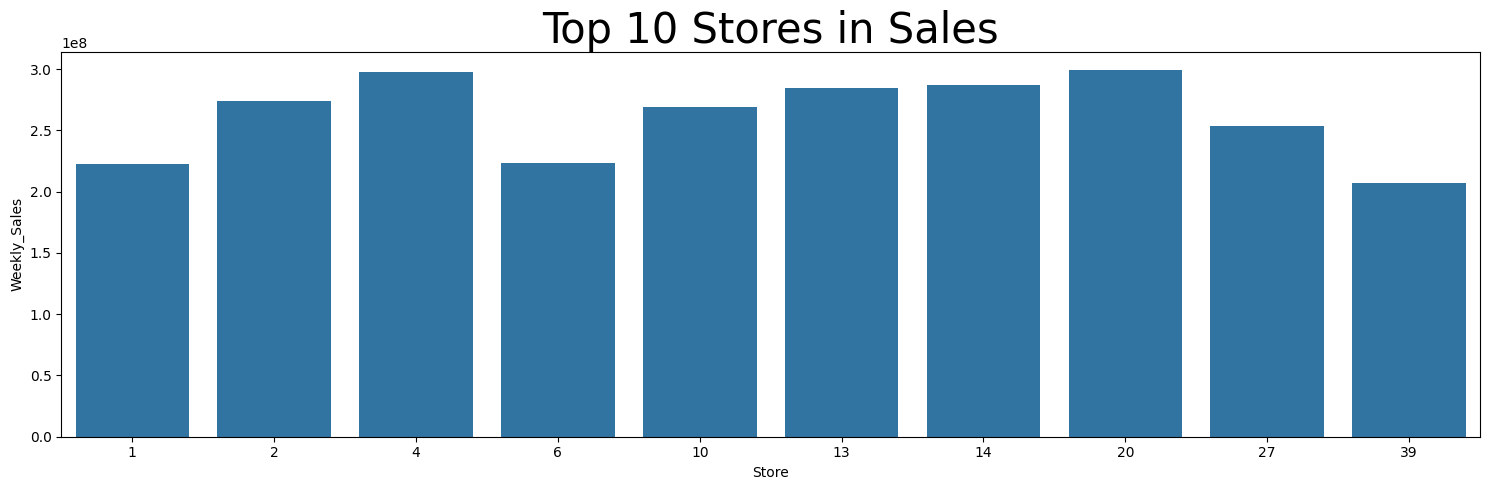

In [110]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store)
plt.title('Top 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

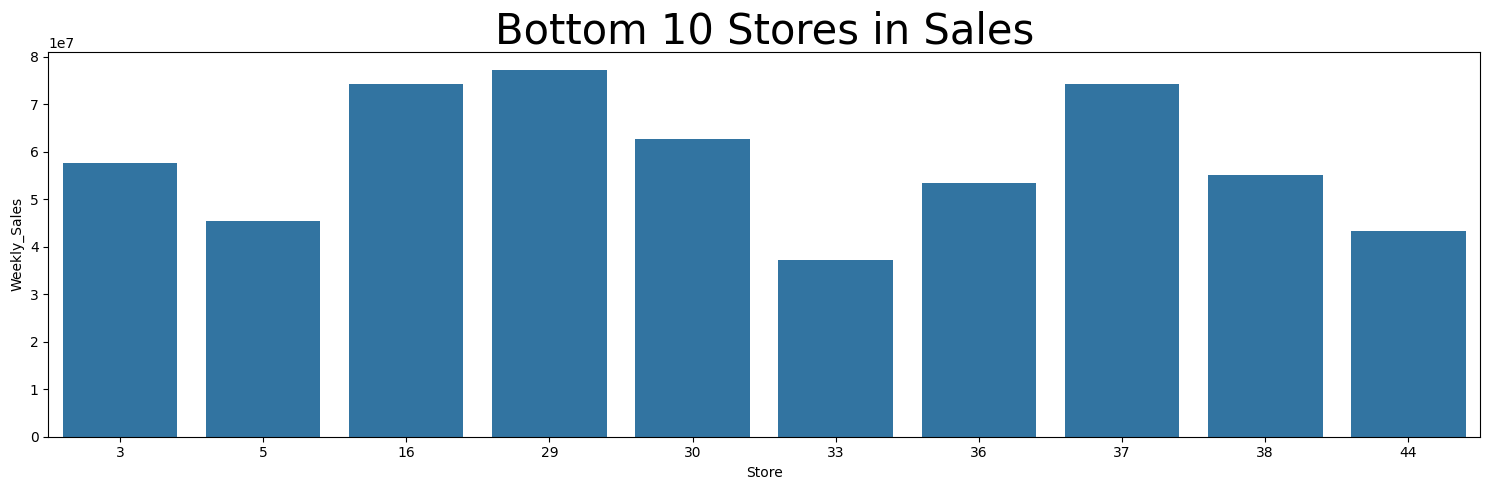

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store)
plt.title('Bottom 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [112]:
from scipy.stats import ttest_ind
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [113]:
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 7.079291347377579e-13


In [114]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 203807667.66124997


In [115]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Temp_Category Fuel_Price_Cat  CPI_cat  \
0  211.096358         8.106         26-50          2.6-3  186-215   
1  211.242170         8.106         26-50          2.6-3  186-215   
2  211.289143         8.106         26-50          2.6-3  186-215   
3  211.319643         8.106         26-50          2.6-3  186-215   
4  211.350143         8.106         26-50          2.6-3  186-215   

   Unemployment_Rate_Cat  
0                      3  
1                      3  
2                      3  
3                      3  
4                      3

In [116]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [117]:
df_stores_sales.set_index('Date',inplace=True)

In [118]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [119]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.652438
p-value                   0.082636
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [121]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

In [123]:
mean1=df_stores_sales.rolling(window=10).mean()
std1=df_stores_sales.rolling(window=10).std()

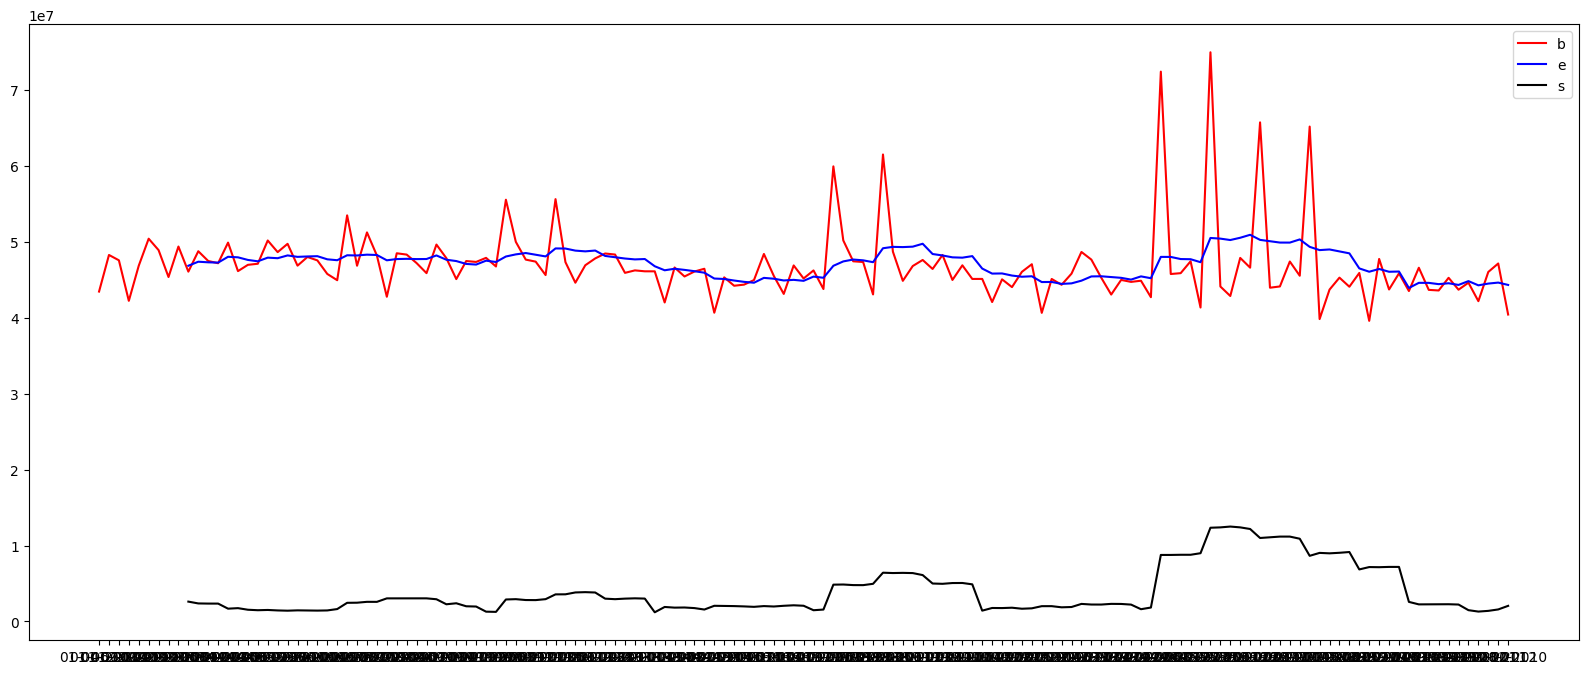

In [124]:
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

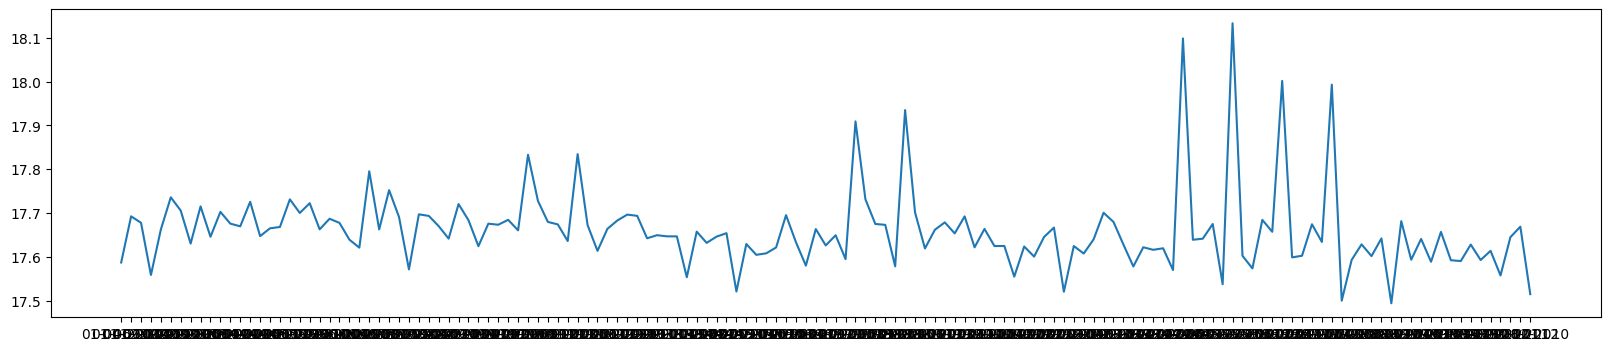

In [125]:
df_log = np.log(df_stores_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

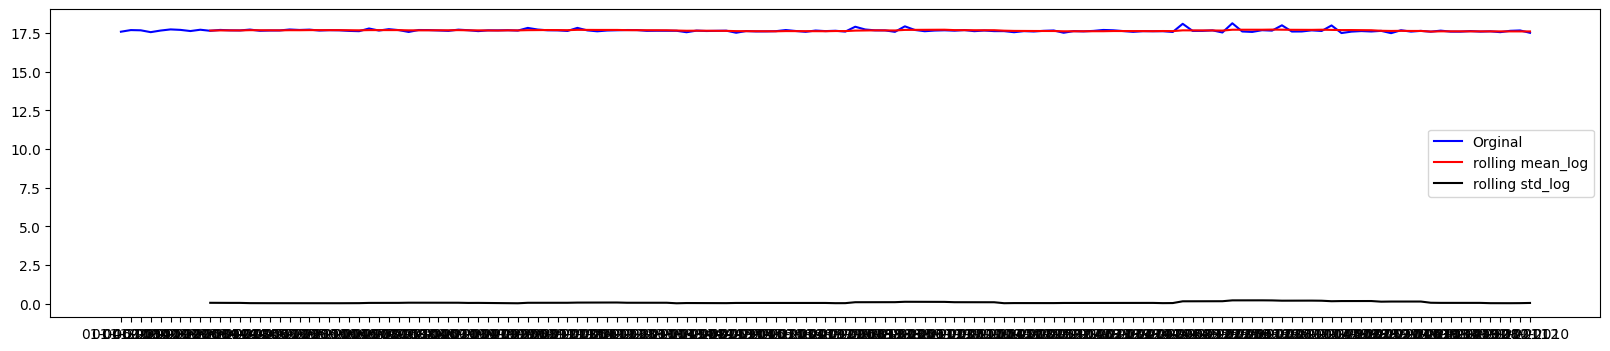

In [126]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [127]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012     -0.015265
03-06-2011      0.029857
03-08-2012      0.004795
03-09-2010     -0.000555
03-12-2010      0.038691
04-02-2011     -0.038024
04-03-2011     -0.013181
04-05-2012     -0.006394
04-06-2010      0.046527
04-11-2011      0.017006
05-02-2010      0.031613

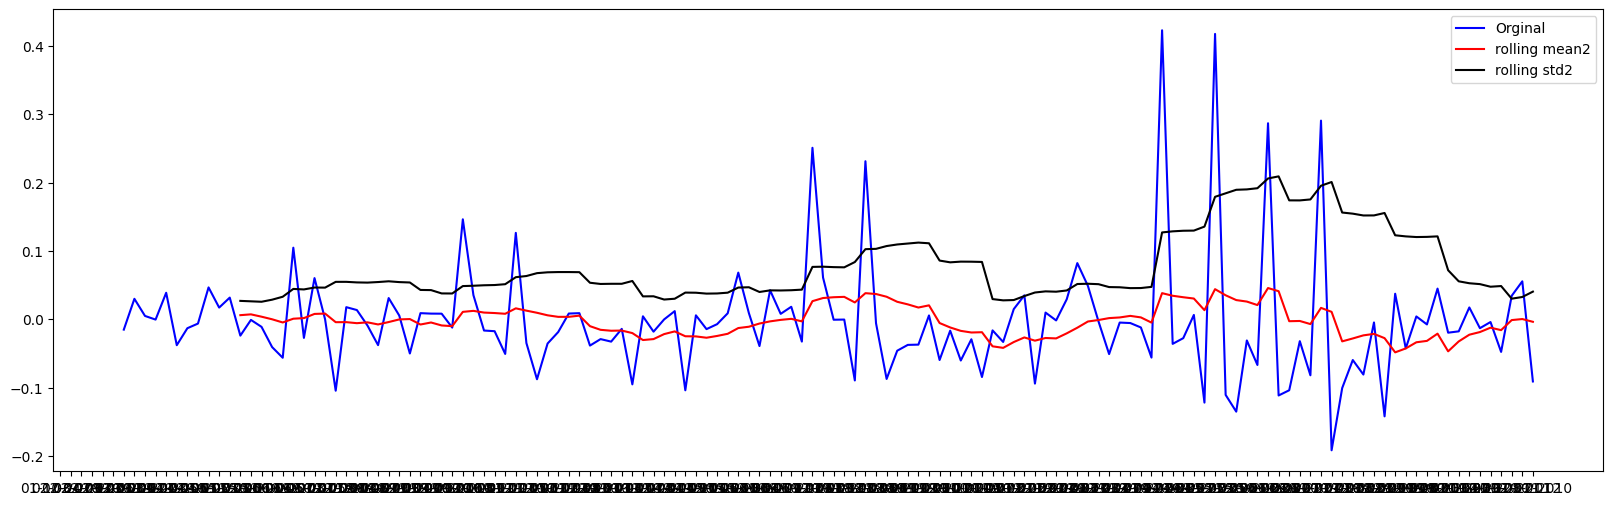

In [129]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [132]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

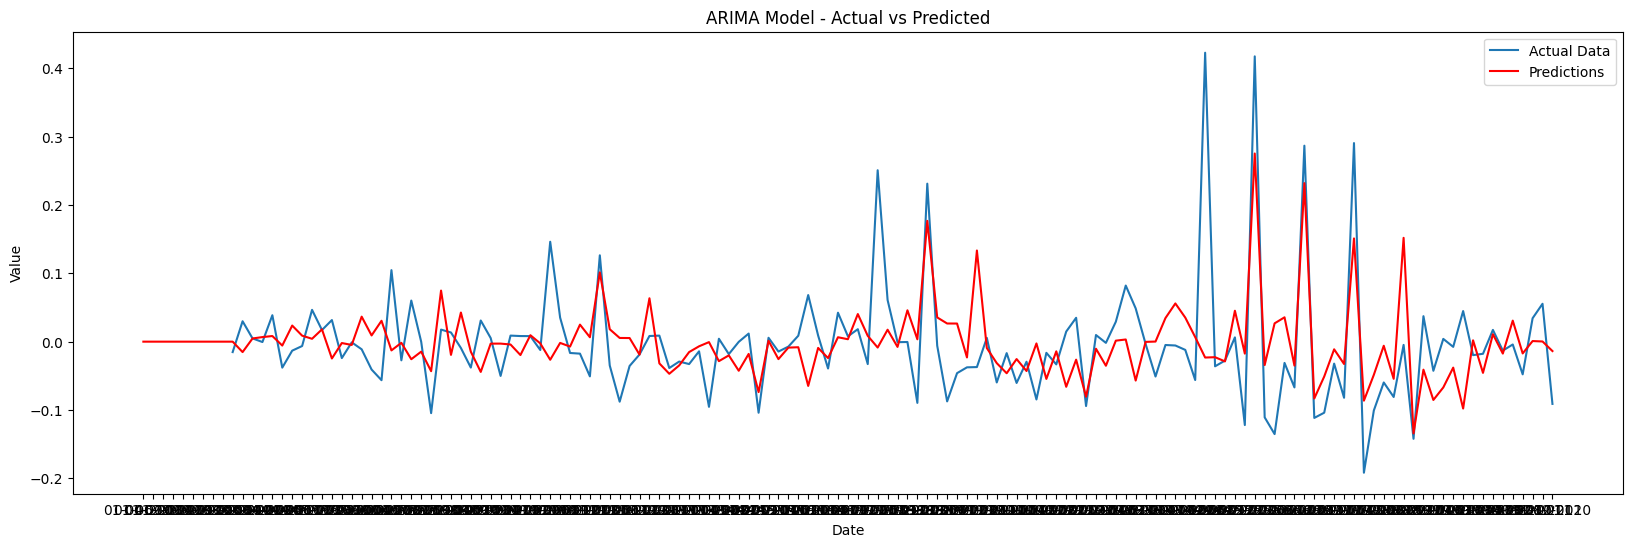

In [133]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [136]:
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [137]:
store1_sales.set_index('Date',inplace=True)

In [138]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.336991
p-value                   0.160315
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [140]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

In [141]:
print(decomposition.plot())

Figure(640x480)


In [142]:
mean1=store1_sales.rolling(window=10).mean()
std1=store1_sales.rolling(window=10).std()

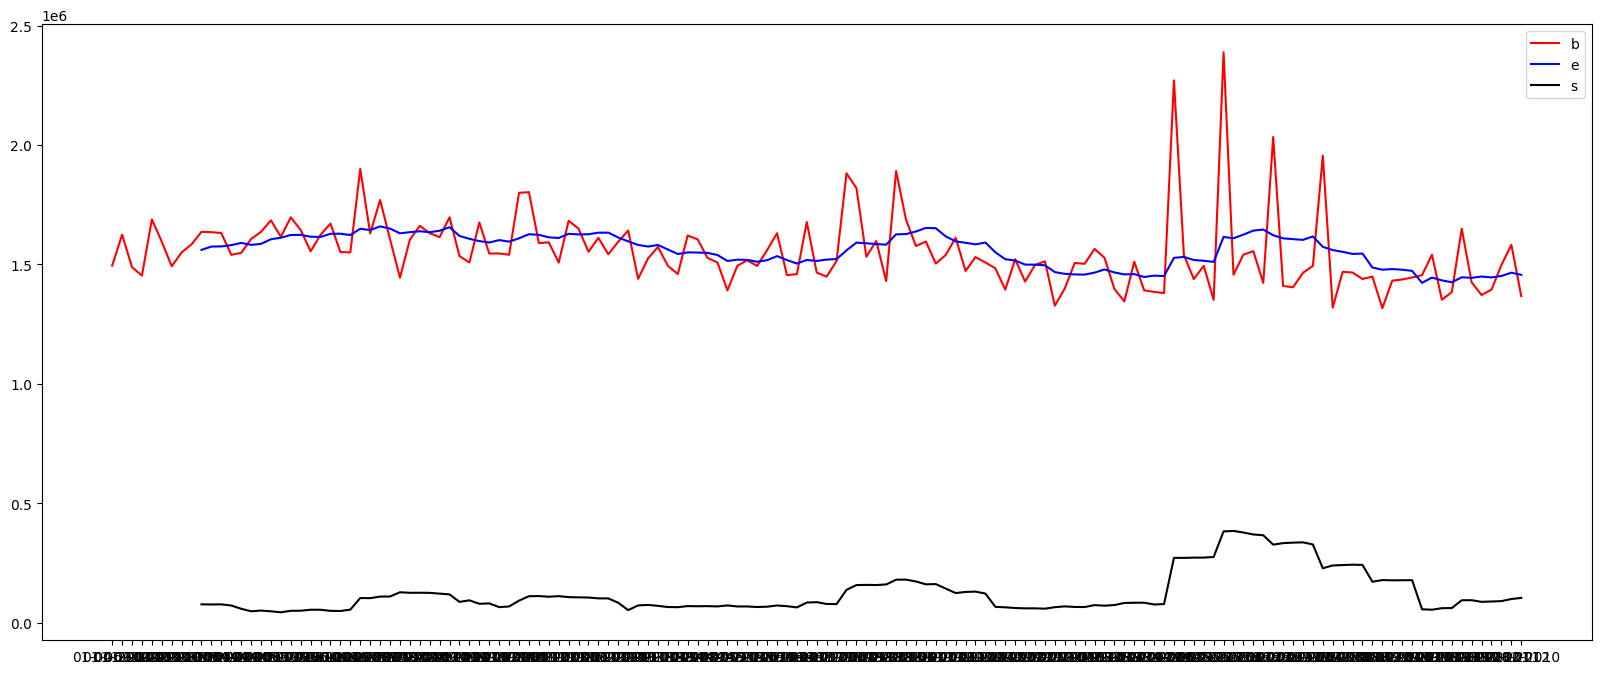

In [143]:
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

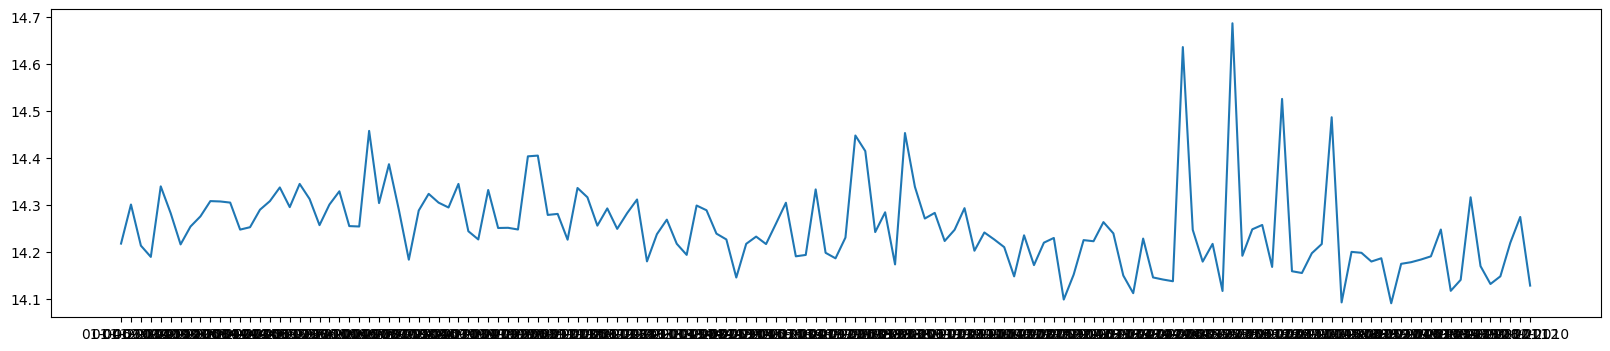

In [144]:
df_log = np.log(store1_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

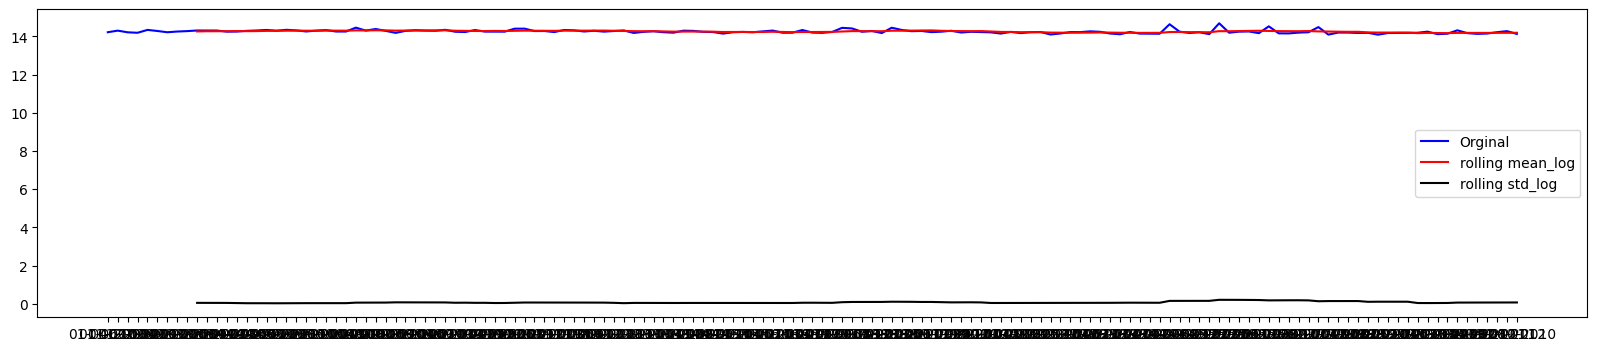

In [145]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [146]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012      0.048369
03-06-2011      0.038646
03-08-2012      0.035823
03-09-2010     -0.024974
03-12-2010     -0.026190
04-02-2011      0.015928
04-03-2011      0.031649
04-05-2012      0.048606
04-06-2010      0.002659
04-11-2011      0.045098
05-02-2010      0.012597

In [147]:
df_new.dropna(inplace = True)

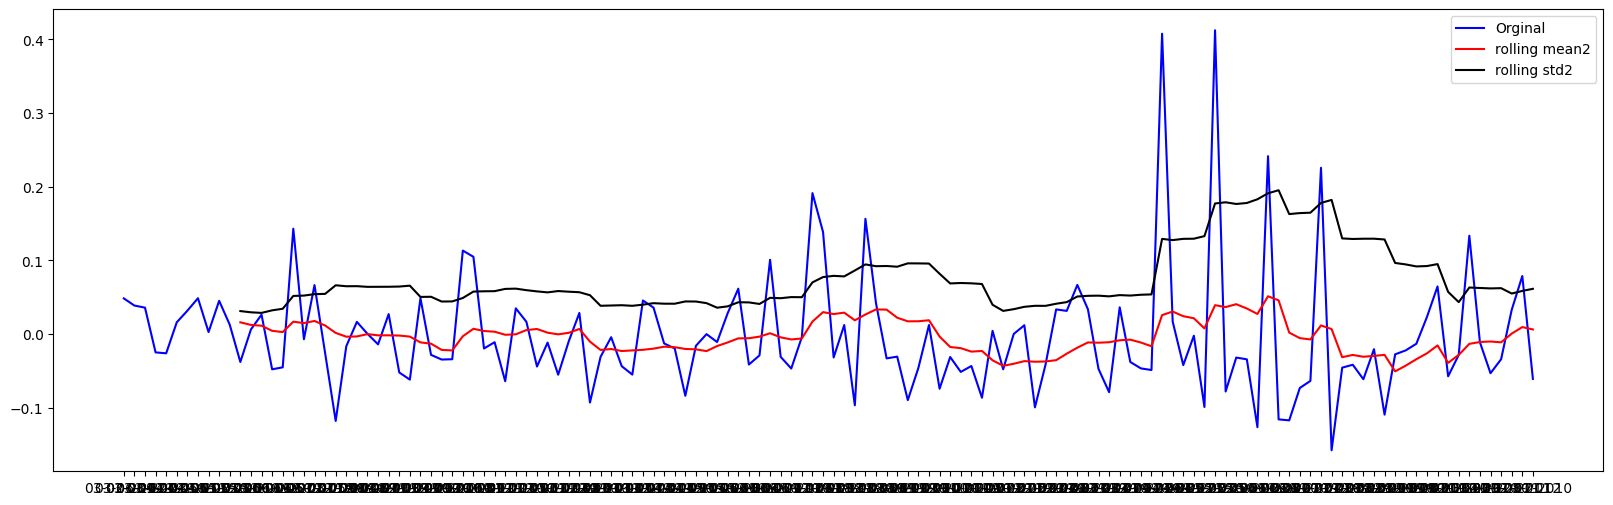

In [148]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [149]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.005694
p-value                   0.001381
# lags used               5.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Rejects the null hypothesis
Data has no unit root and is stationary


In [150]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [151]:
p, d, q = 2, 1, 2  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

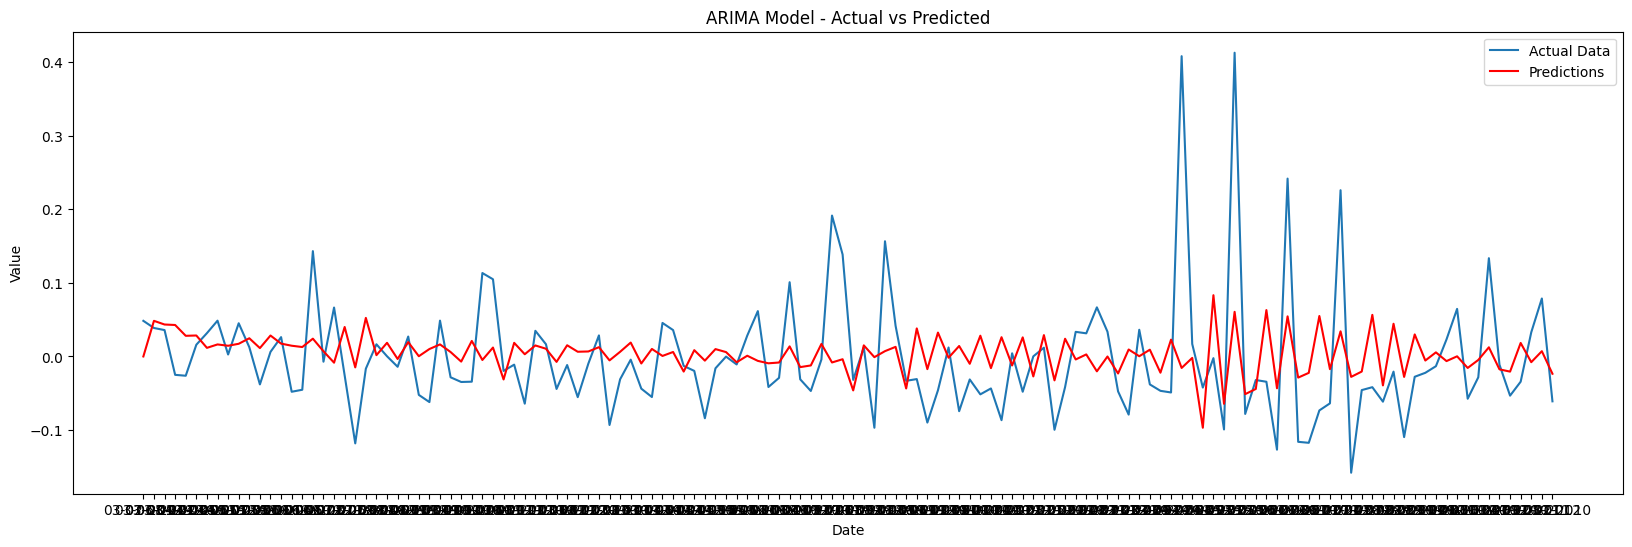

In [152]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



In [153]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.006352408572746255


In [154]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.07970199854926008


In [155]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [156]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [157]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [158]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [159]:
forecast_df.set_index('Date',inplace=True)

In [161]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.07970199854926008


In [162]:
store6_sales=df[df['Store']==6].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [163]:
store6_sales.set_index('Date',inplace=True)

In [164]:
adf_test(store6_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.308444
p-value                   0.014505
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [165]:
decomposition=seasonal_decompose(store6_sales['Weekly_Sales'],period=13)

Figure(640x480)


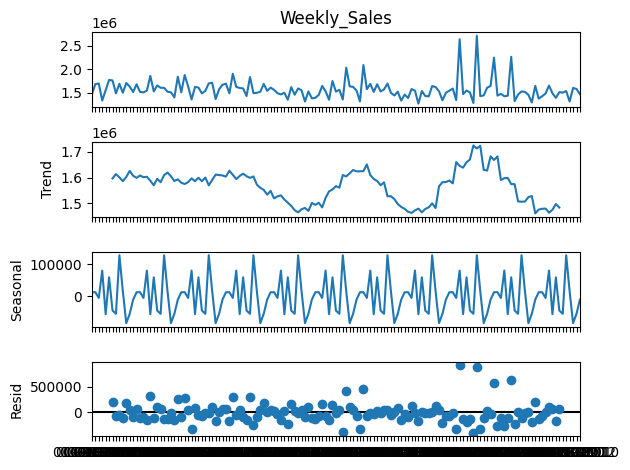

In [166]:
print(decomposition.plot())

In [167]:
mean1=store6_sales.rolling(window=10).mean()
std1=store6_sales.rolling(window=10).std()

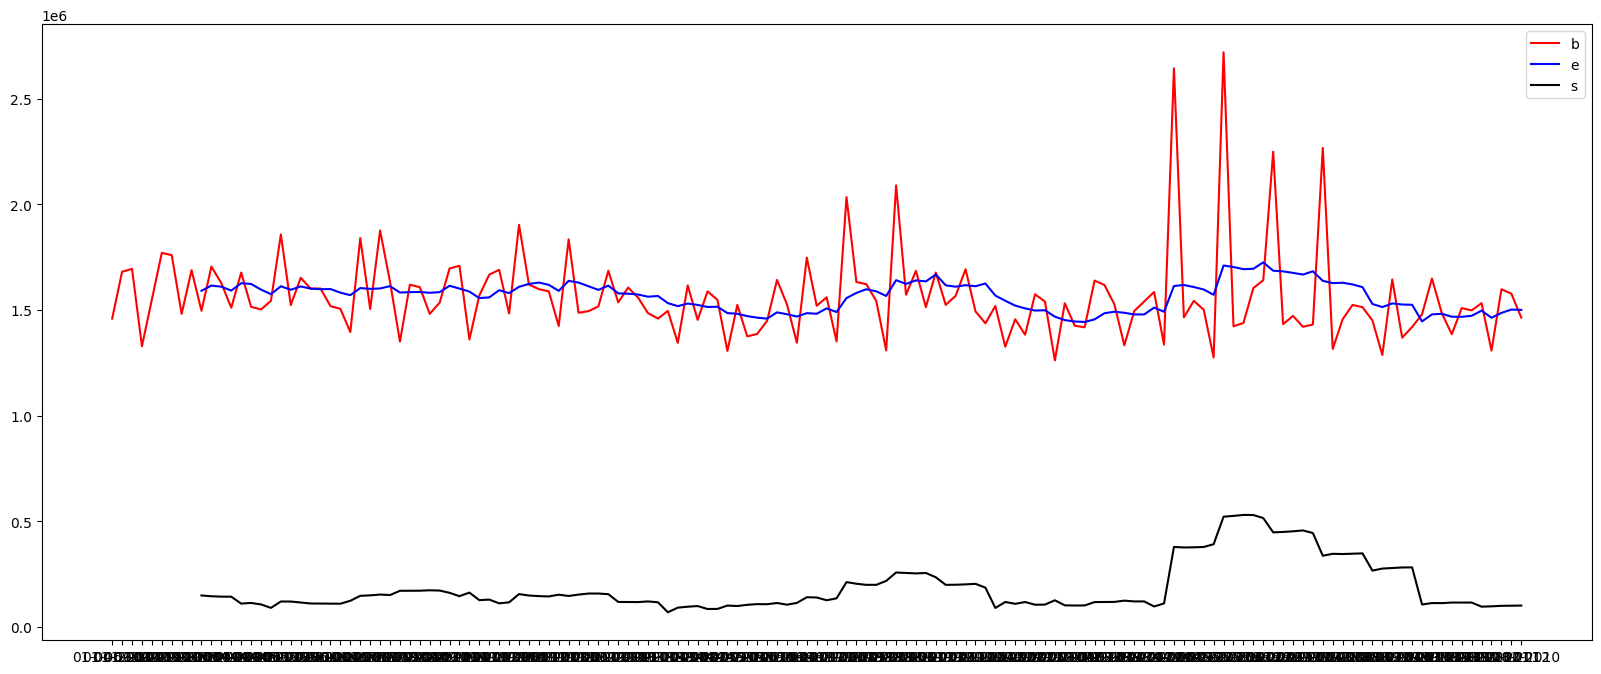

In [168]:
plt.figure(figsize=(20,8))
orig=plt.plot(store6_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

In [169]:
df_log = np.log(store6_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

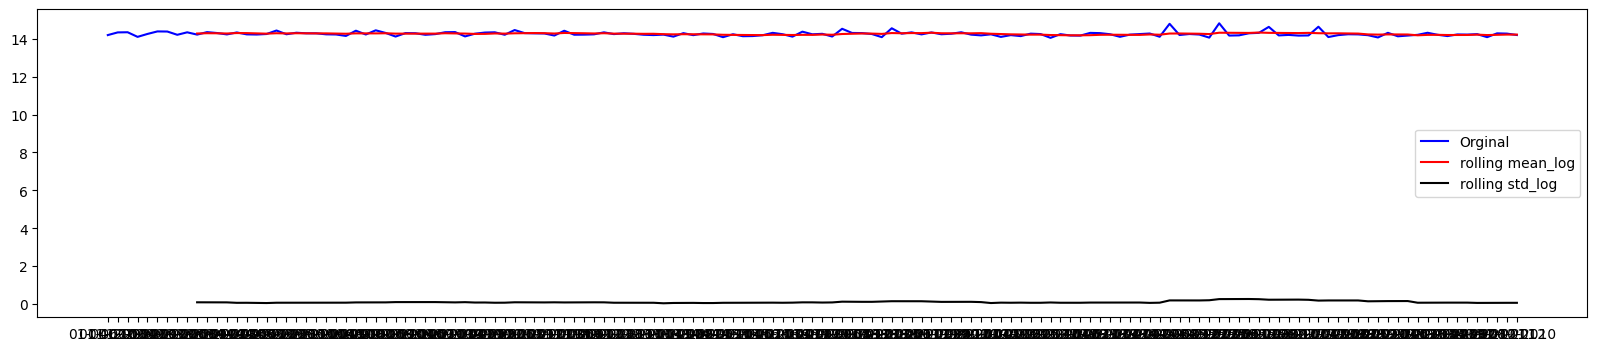

In [170]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [171]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012     -0.057371
03-06-2011      0.057900
03-08-2012      0.014200
03-09-2010     -0.048515
03-12-2010      0.032508
04-02-2011     -0.066815
04-03-2011     -0.058625
04-05-2012     -0.018691
04-06-2010      0.143846
04-11-2011     -0.044073
05-02-2010      0.027403

In [172]:
df_new.dropna(inplace = True)

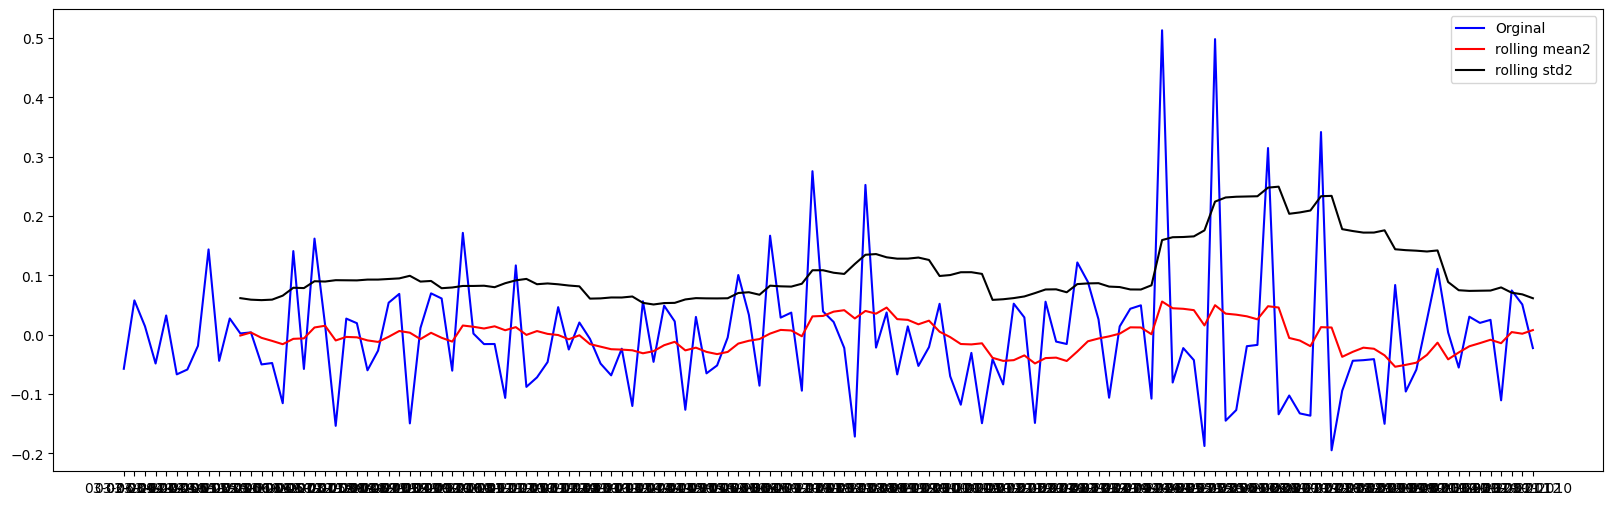

In [173]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [174]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.278412
p-value                   0.000484
# lags used               4.000000
# observations          129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Rejects the null hypothesis
Data has no unit root and is stationary


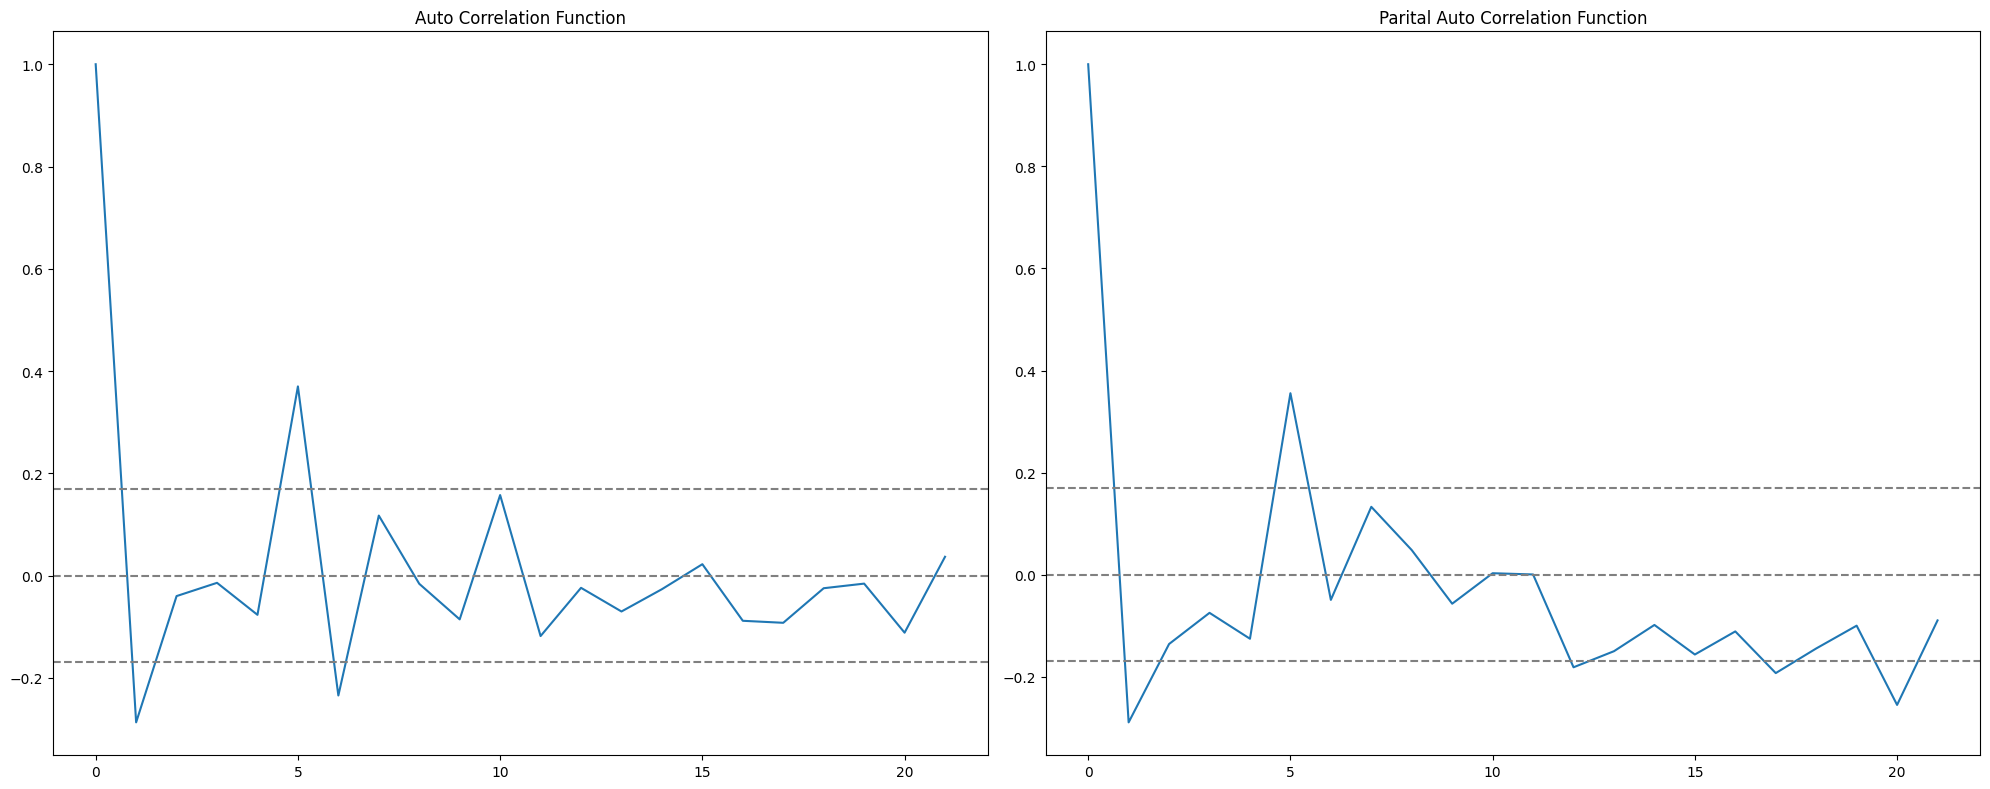

In [175]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [176]:
p, d, q = 4, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


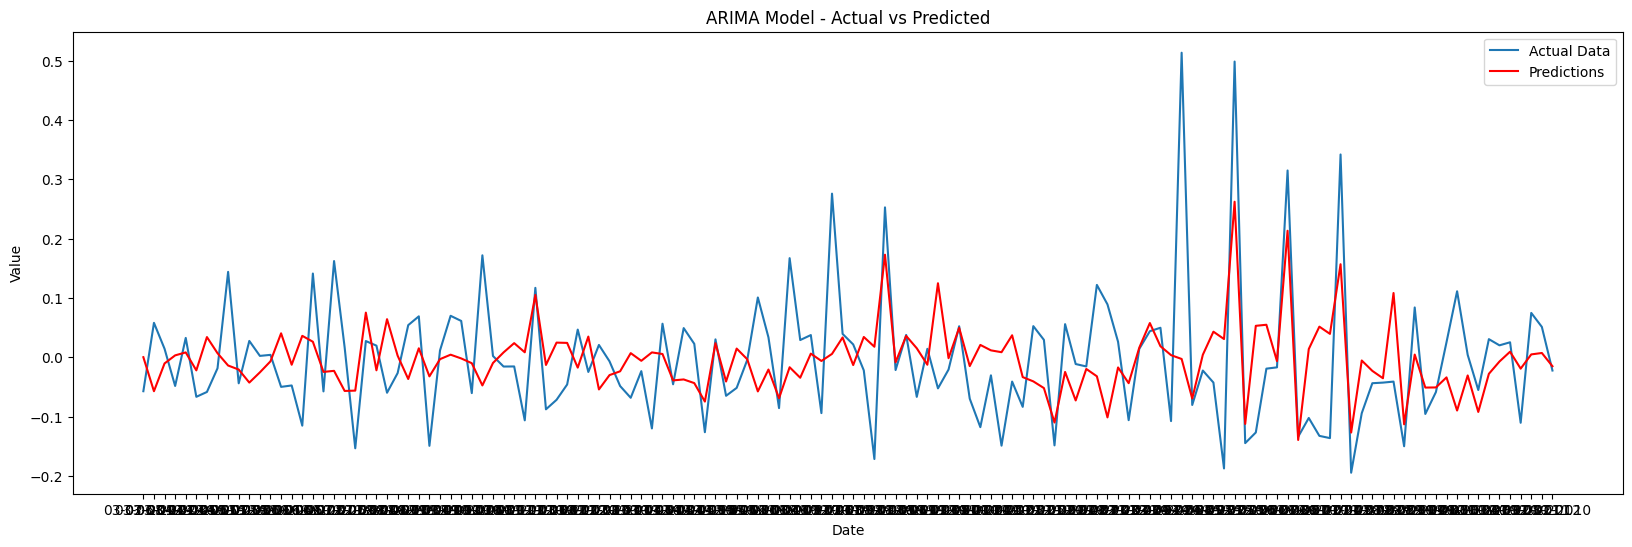

In [177]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [178]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.01049439609892884


In [179]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.10244215977286325


In [180]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [181]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [182]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})


In [183]:
forecast_df.set_index('Date',inplace=True)

Figure(640x480)


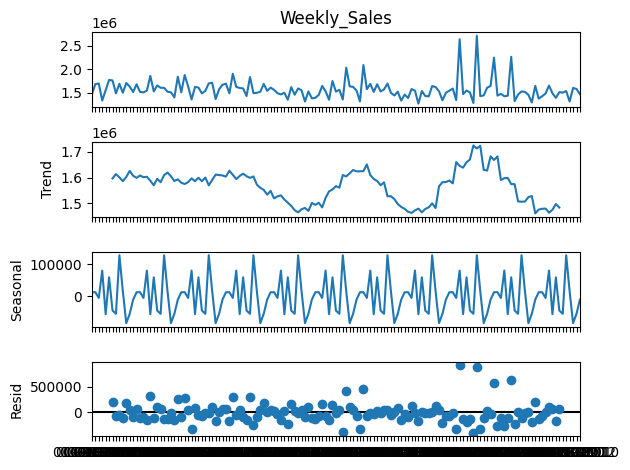

In [187]:
print(decomposition.plot())

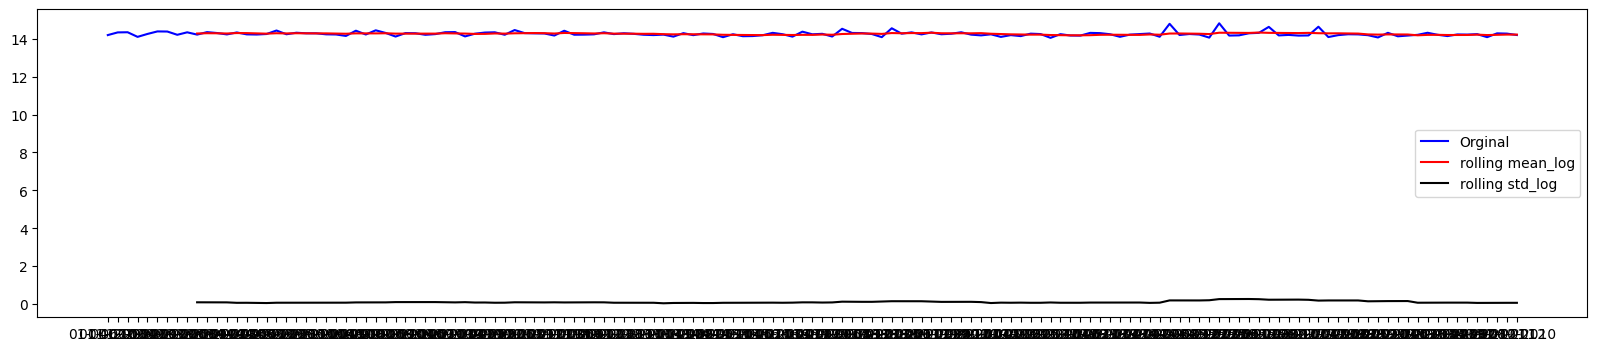

In [191]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [192]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012     -0.057371
03-06-2011      0.057900
03-08-2012      0.014200
03-09-2010     -0.048515
03-12-2010      0.032508
04-02-2011     -0.066815
04-03-2011     -0.058625
04-05-2012     -0.018691
04-06-2010      0.143846
04-11-2011     -0.044073
05-02-2010      0.027403

In [193]:
df_new.dropna(inplace = True)

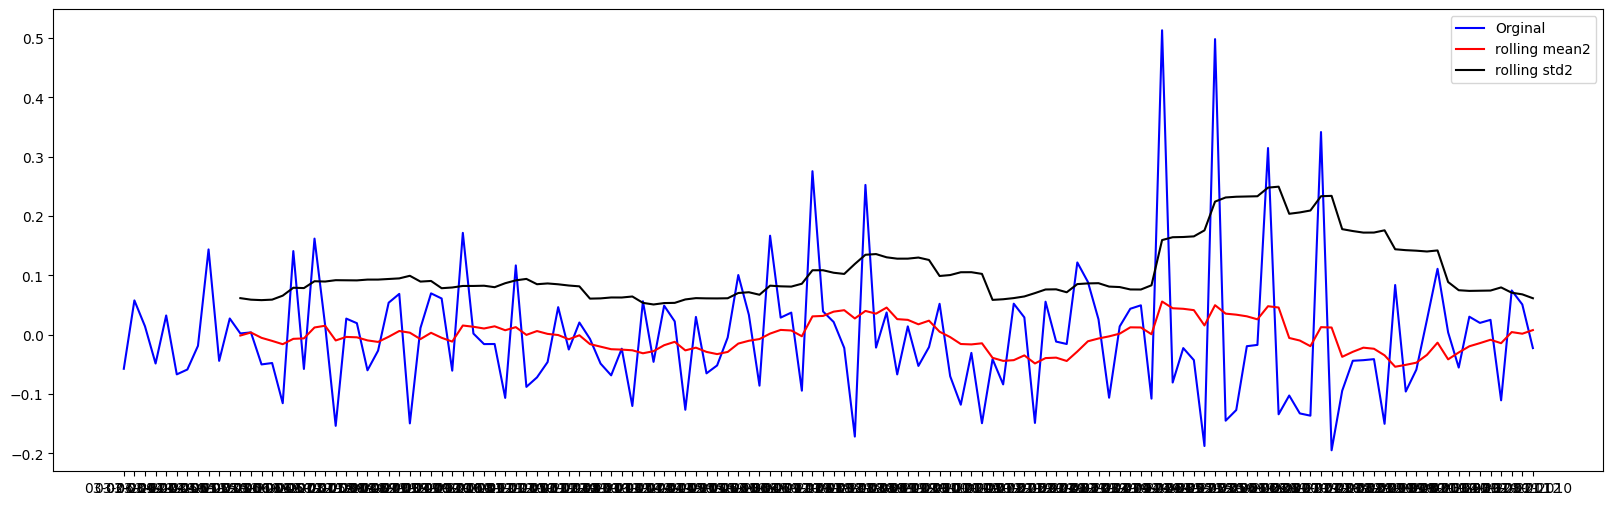

In [194]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [195]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.278412
p-value                   0.000484
# lags used               4.000000
# observations          129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Rejects the null hypothesis
Data has no unit root and is stationary


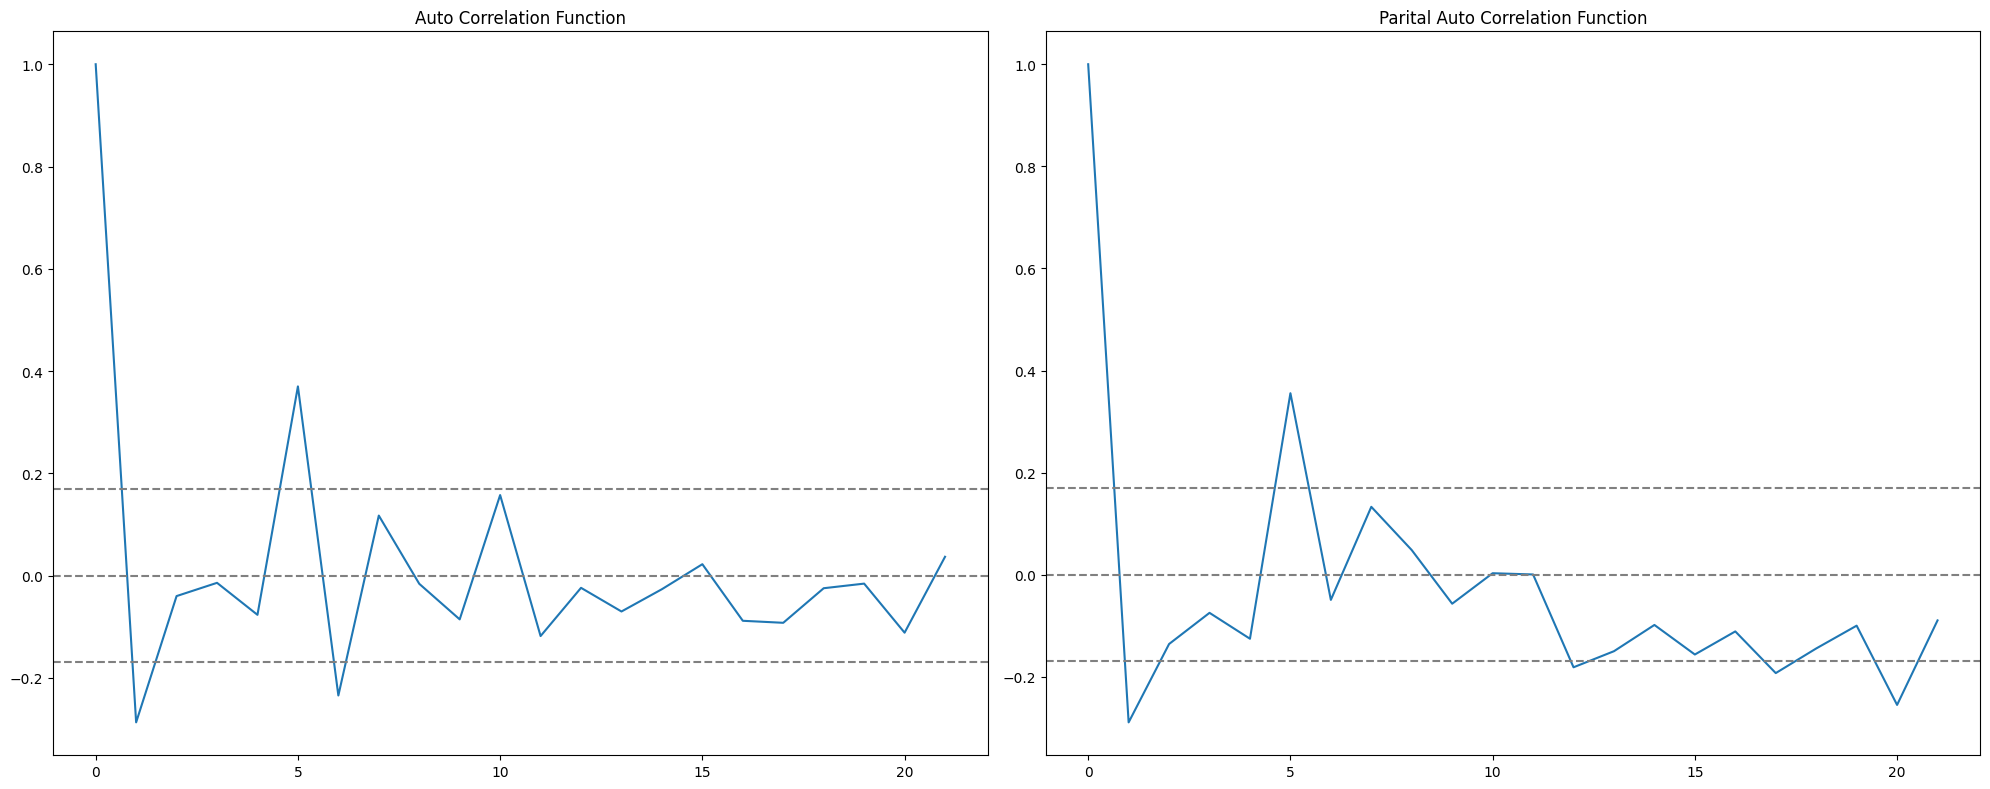

In [196]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [197]:
p, d, q = 3, 1, 2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

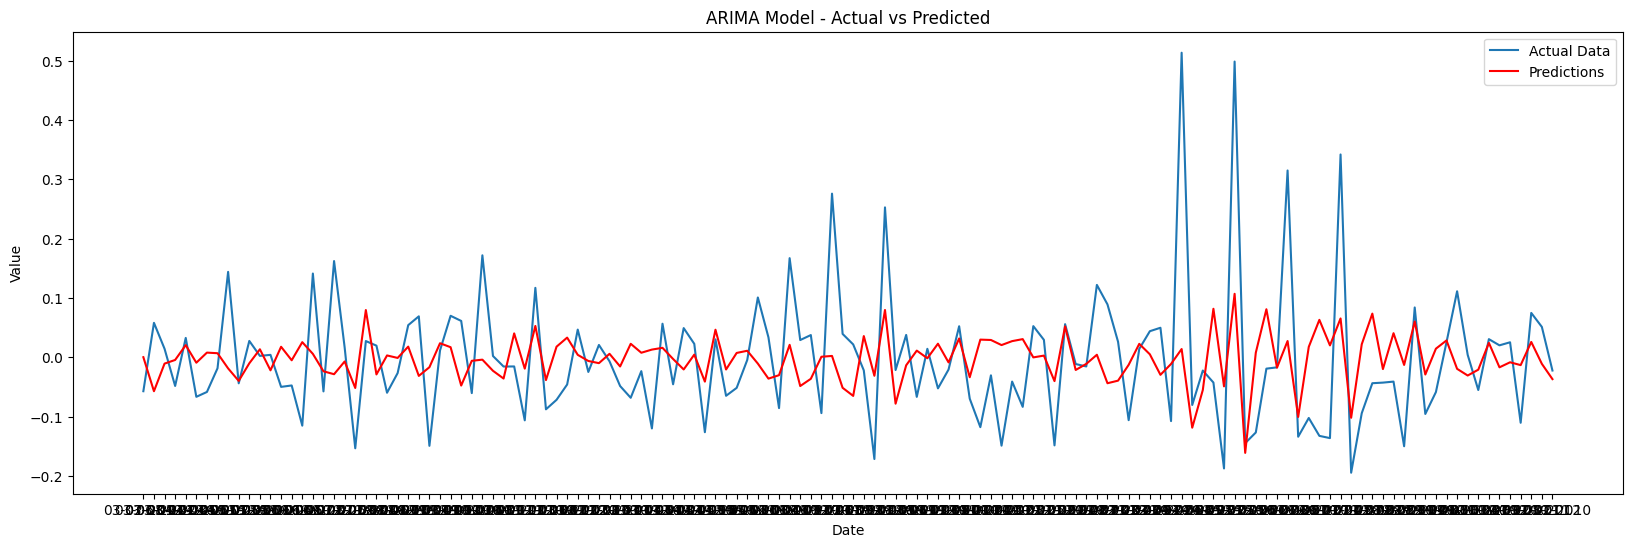

In [198]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [199]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.011288311301403986


In [200]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.106246464888974


In [201]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [202]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [203]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [204]:
forecast_df.set_index('Date',inplace=True)

In [206]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.106246464888974


In [207]:
store17_sales=df[df['Store']==17].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [208]:
store17_sales.set_index('Date',inplace=True)

In [209]:
adf_test(store17_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.849337
p-value                   0.002441
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [210]:
decomposition=seasonal_decompose(store17_sales['Weekly_Sales'],period=13)

Figure(640x480)


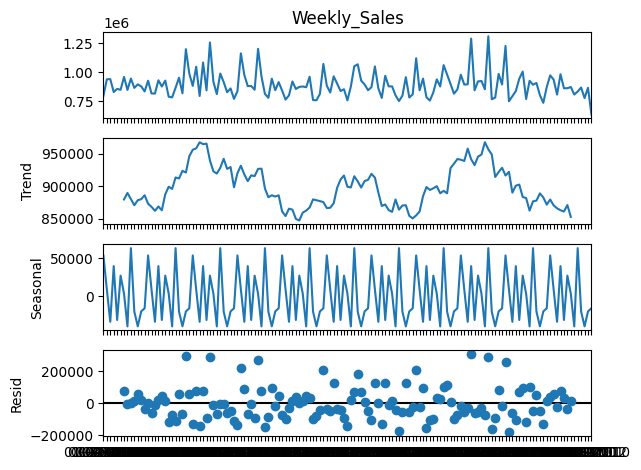

In [211]:
print(decomposition.plot())

In [212]:
mean1=store17_sales.rolling(window=10).mean()
std1=store17_sales.rolling(window=10).std()

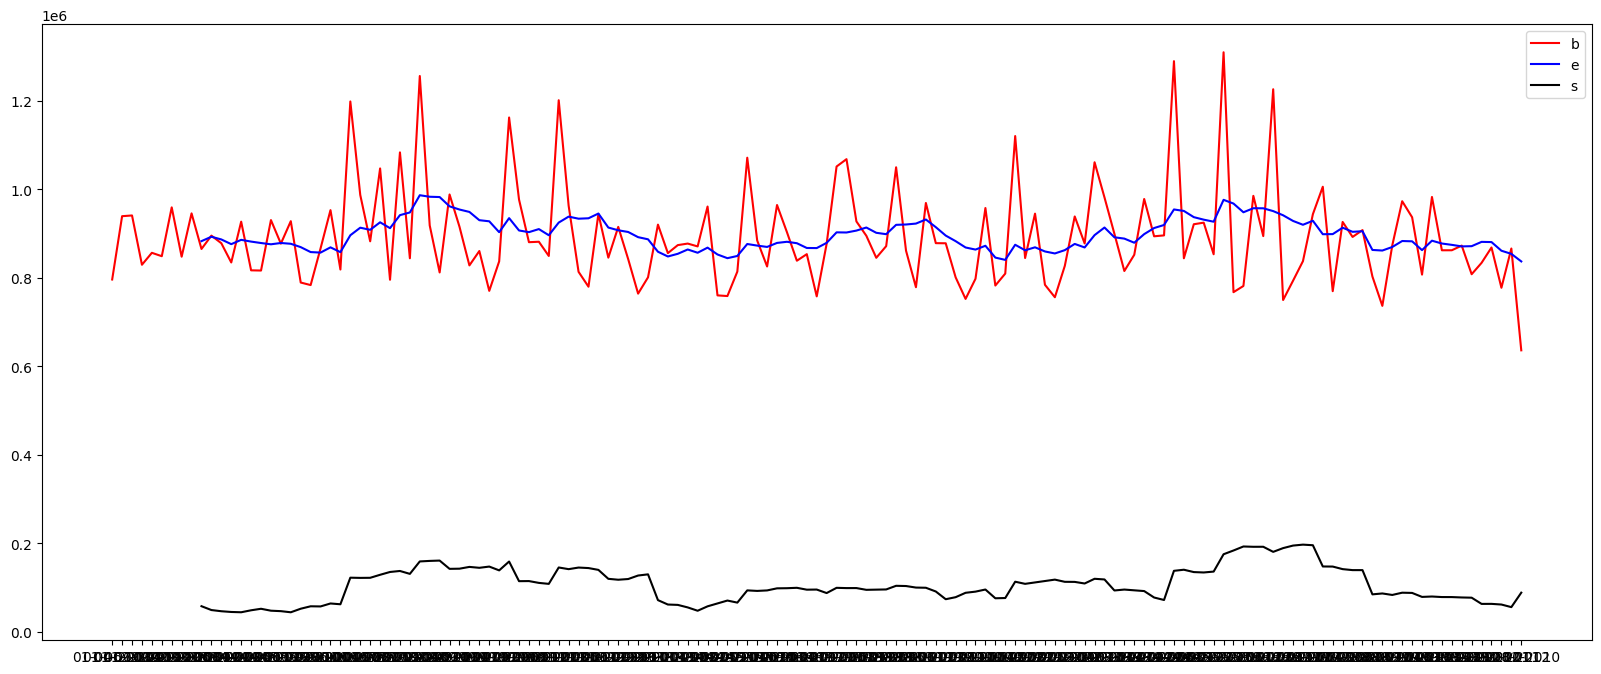

In [213]:
plt.figure(figsize=(20,8))
orig=plt.plot(store17_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

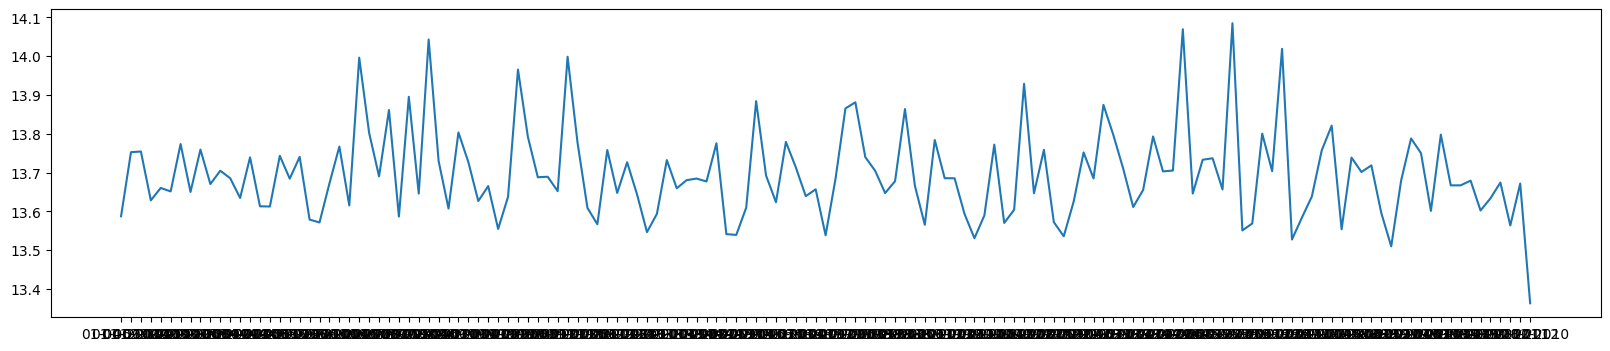

In [214]:
df_log = np.log(store17_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

In [215]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [216]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012     -0.018340
03-06-2011      0.004204
03-08-2012     -0.008479
03-09-2010     -0.047253
03-12-2010      0.046457
04-02-2011     -0.075151
04-03-2011     -0.071829
04-05-2012      0.061946
04-06-2010     -0.000397
04-11-2011      0.057750
05-02-2010     -0.094926

In [217]:
df_new.dropna(inplace = True)

In [218]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [219]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.424758
p-value                   0.000268
# lags used               4.000000
# observations          129.000000
critical value (1%)      -3.482088
critical value (5%)      -2.884219
critical value (10%)     -2.578864
Rejects the null hypothesis
Data has no unit root and is stationary


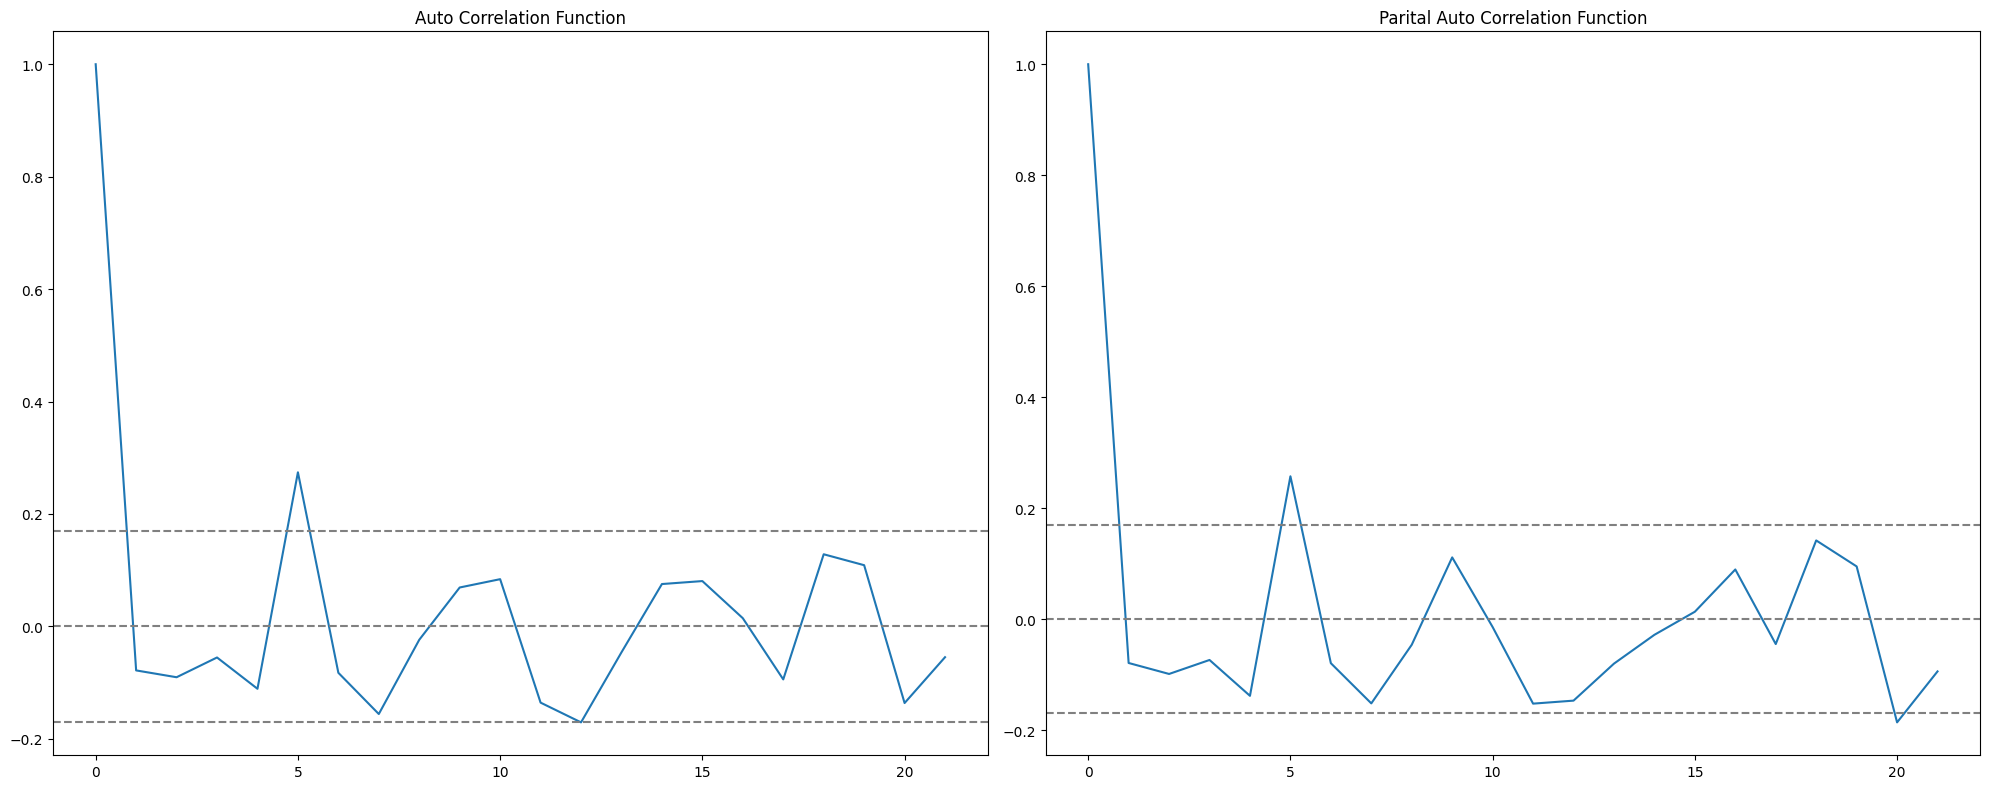

In [220]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [221]:
p, d, q = 3, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

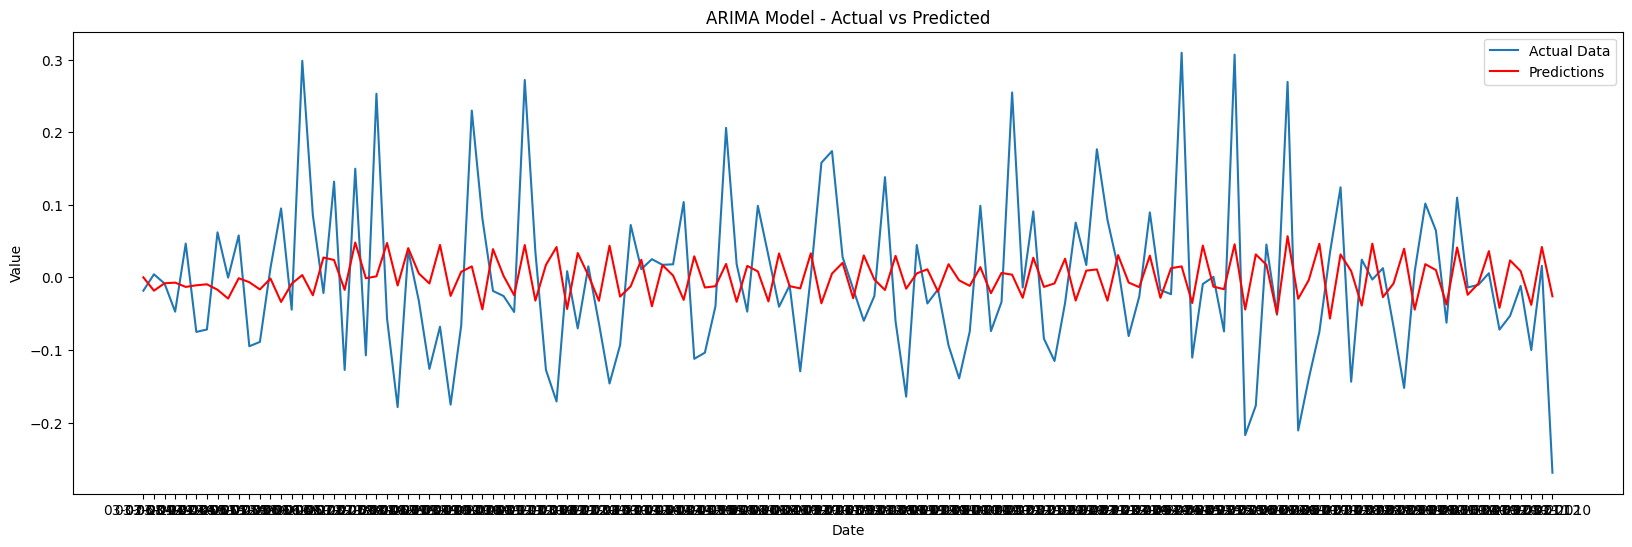

In [222]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [223]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.011902973693700868


In [224]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.10910075019769969


In [225]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [226]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [227]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [228]:
forecast_df.set_index('Date',inplace=True)

In [230]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.10910075019769969


In [231]:
store33_sales=df[df['Store']==33].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [232]:
store33_sales.set_index('Date',inplace=True)

In [233]:
adf_test(store33_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -0.798444
p-value                   0.819579
# lags used              14.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [234]:
decomposition=seasonal_decompose(store33_sales['Weekly_Sales'],period=13)

Figure(640x480)


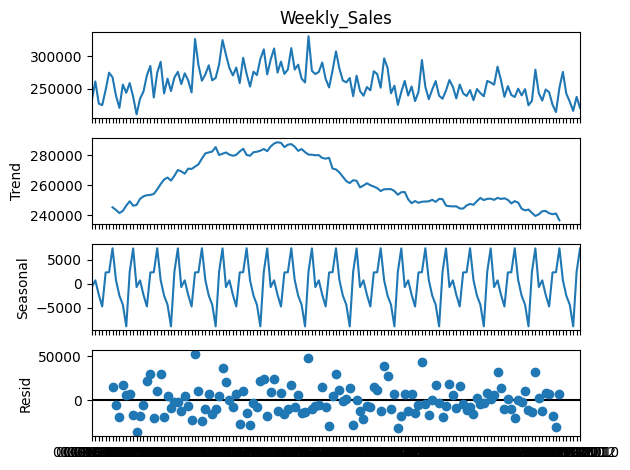

In [235]:
print(decomposition.plot())

In [236]:
mean1=store33_sales.rolling(window=10).mean()
std1=store33_sales.rolling(window=10).std()

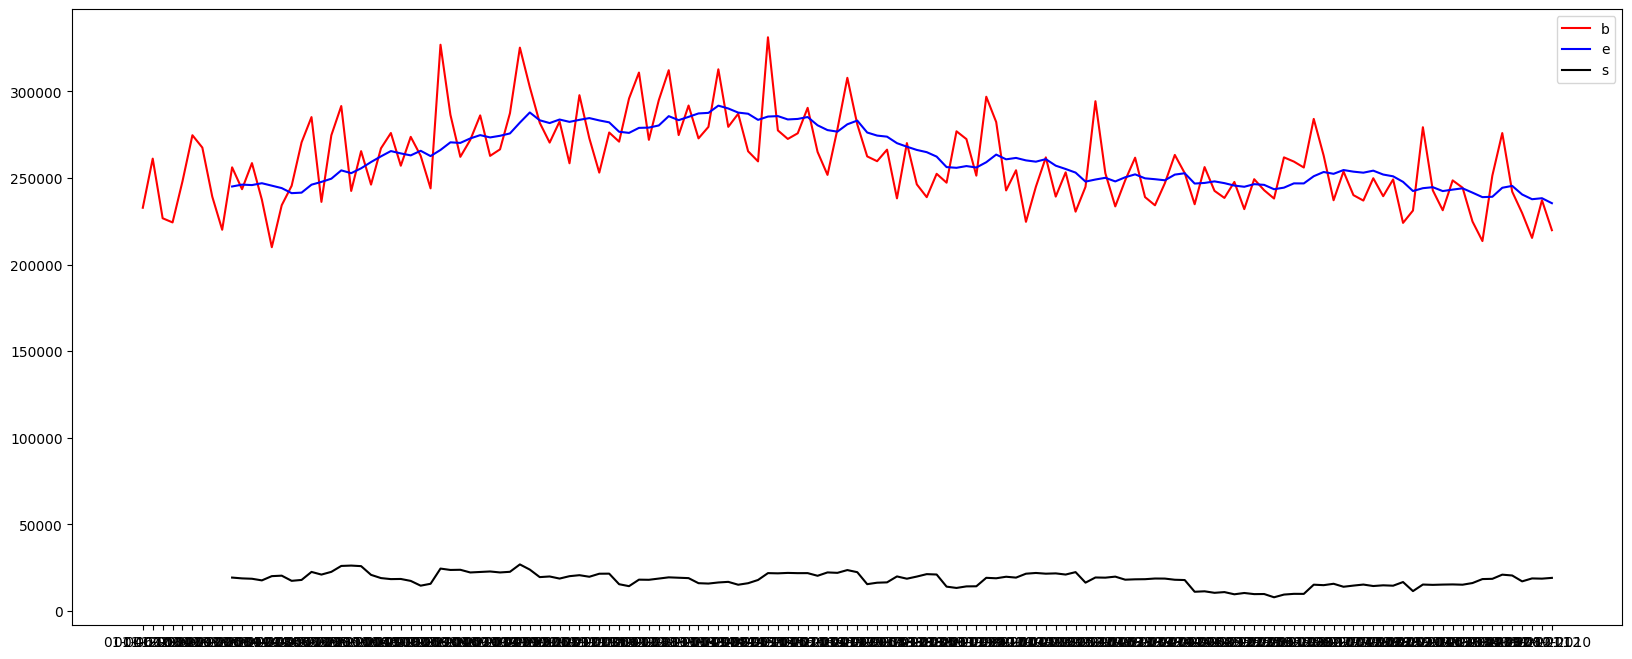

In [237]:
plt.figure(figsize=(20,8))
orig=plt.plot(store33_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

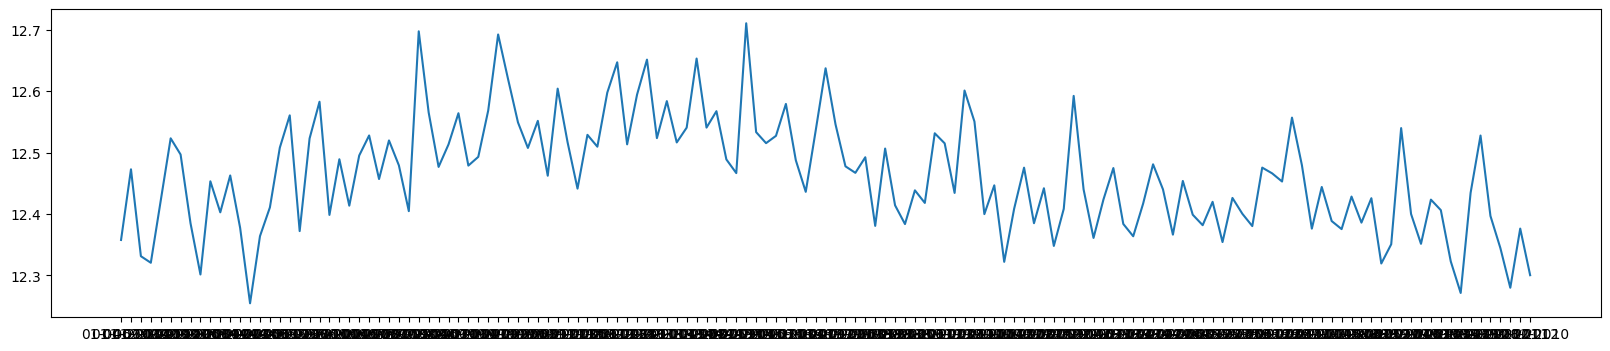

In [238]:
df_log = np.log(store33_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

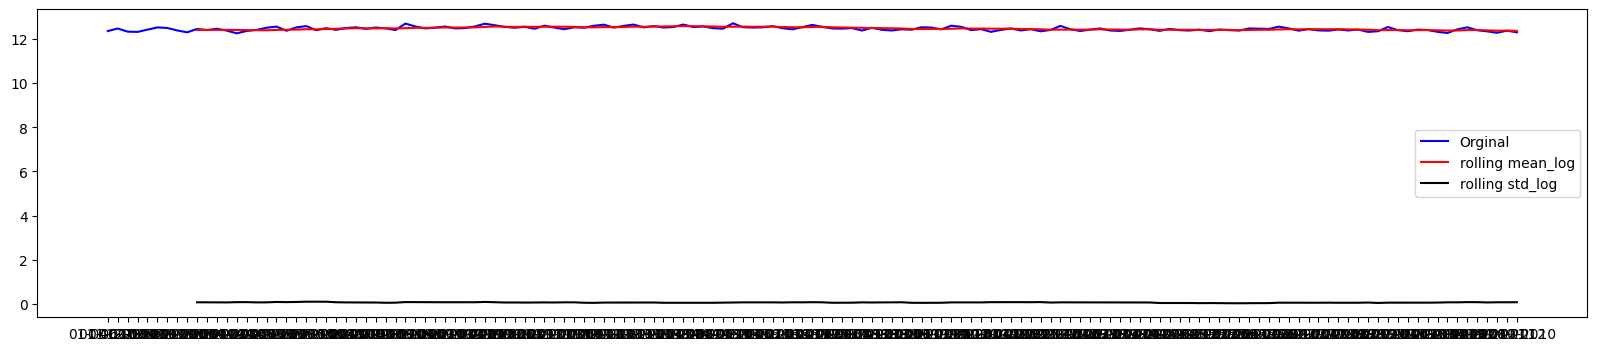

In [239]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [240]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
01-04-2011           NaN
01-06-2012           NaN
01-07-2011           NaN
01-10-2010           NaN
02-03-2012           NaN
02-04-2010           NaN
02-07-2010           NaN
02-09-2011           NaN
02-12-2011           NaN
03-02-2012      0.046876
03-06-2011     -0.008133
03-08-2012      0.052868
03-09-2010     -0.036998
03-12-2010     -0.153135
04-02-2011     -0.038186
04-03-2011      0.019837
04-05-2012      0.115949
04-06-2010      0.150971
04-11-2011     -0.044431
05-02-2010      0.099388

In [241]:
df_new.dropna(inplace = True)

In [242]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [243]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.058407
p-value                   0.261565
# lags used              13.000000
# observations          120.000000
critical value (1%)      -3.486056
critical value (5%)      -2.885943
critical value (10%)     -2.579785
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [244]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [245]:
p, d, q = 2, 1, 2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


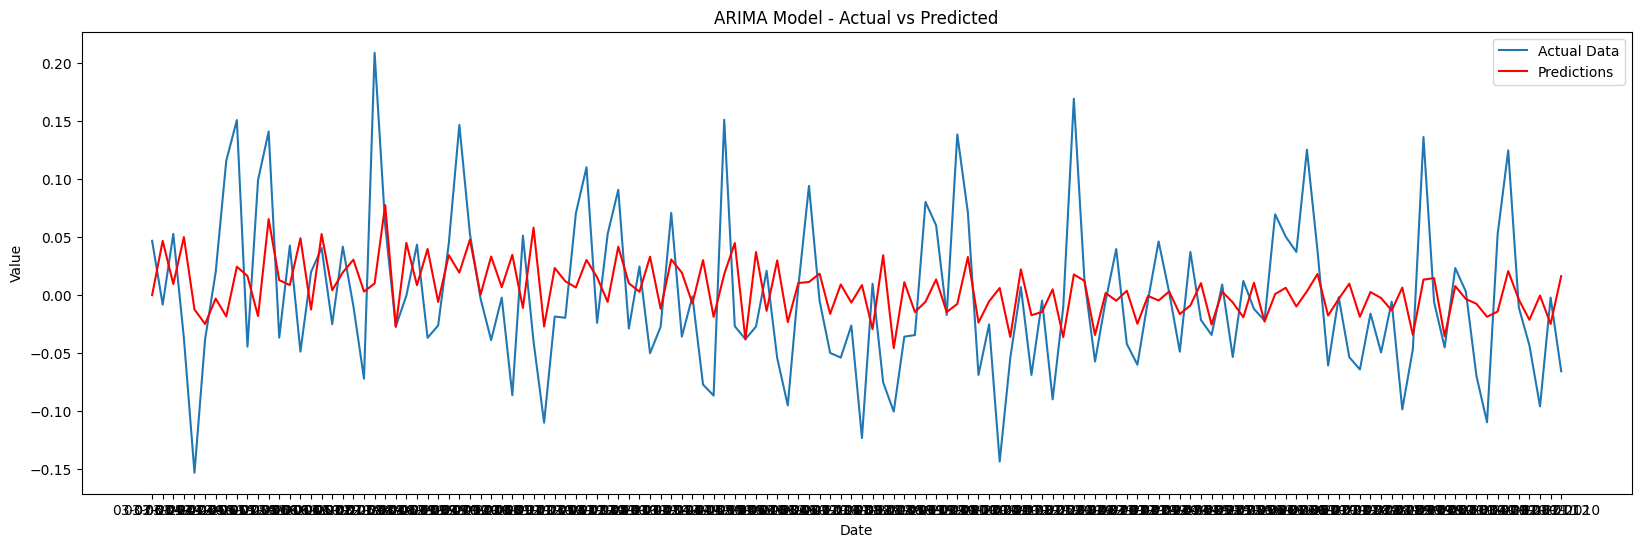

In [246]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [247]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.004313706398006079


In [248]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.06567881239795738


In [249]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [250]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [251]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [252]:
forecast_df.set_index('Date',inplace=True)

In [254]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.06567881239795738
